# **FORMULA 1 RESULT PREDICTOR**
1. **Data Collection/Preparation**
2. **Exploratory Data Analysis + Processing**
3. **Modeling**

# **Data Collection/Preparation**


Reading Ergast API Databases...

In [1]:
import pandas as pd

In [ ]:
races = pd.read_csv('races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [ ]:
results = pd.read_csv('results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25975,25981,1105,848,3,23,18,16,16,16,0.0,65,\N,\N,59,19,1:19.133,211.861,11
25976,25982,1105,846,1,4,3,17,17,17,0.0,65,\N,\N,55,4,1:17.182,217.216,11
25977,25983,1105,825,210,20,17,18,18,18,0.0,65,\N,\N,44,6,1:18.069,214.748,11
25978,25984,1105,822,51,77,16,19,19,19,0.0,65,\N,\N,50,8,1:18.242,214.273,11


In [ ]:
drivers = pd.read_csv('drivers.csv')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [7]:
quali = pd.read_csv('qualifying.csv')
quali

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9710,9768,1105,822,51,77,16,1:13.977,\N,\N
9711,9769,1105,825,210,20,17,1:14.042,\N,\N
9712,9770,1105,848,3,23,18,1:14.063,\N,\N
9713,9771,1105,844,6,16,19,1:14.079,\N,\N


In [ ]:
constructors = pd.read_csv('constructors.csv')
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


Loading weather data into races through web scraping...

In [ ]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_weather_info(url):

  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  weather_info = ''
  section = soup.find('th', text='Weather')

  if section:
    weather_info = section.find_next('td').text.strip()
  return weather_info





In [ ]:
for index, row in races.iterrows():
    url = row['url']
    weather = get_weather_info(url)
    races.at[index, 'weather_info'] = weather

Save dataframe...

In [ ]:
df1 = races
df1.to_csv('df1_with_weather.csv', index=False)


In [ ]:
import numpy as np

Read dataframe from computer...

In [ ]:
df1 = pd.read_csv('df1_with_weather.csv')
df1

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,weather_info
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sunny with temperatures reaching up to 27 °C (...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,"Dry start, with heavy rain and thunderstorm/mo..."
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Rain
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sunny
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,"Warm, Sunny"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00,NaN
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N,NaN
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,NaN
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N,NaN


In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25975,25981,1105,848,3,23,18,16,16,16,0.0,65,\N,\N,59,19,1:19.133,211.861,11
25976,25982,1105,846,1,4,3,17,17,17,0.0,65,\N,\N,55,4,1:17.182,217.216,11
25977,25983,1105,825,210,20,17,18,18,18,0.0,65,\N,\N,44,6,1:18.069,214.748,11
25978,25984,1105,822,51,77,16,19,19,19,0.0,65,\N,\N,50,8,1:18.242,214.273,11


In [ ]:
df1 = df1[df1['year'] >= 2010] #f1 introduced new points system in 2010
df1

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,weather_info
336,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sunny
337,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Overcast with light rain at start
338,339,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,http://en.wikipedia.org/wiki/2010_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,"Mainly cloudy, dry"
339,340,2010,4,17,Chinese Grand Prix,2010-04-18,06:00:00,http://en.wikipedia.org/wiki/2010_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,"Cloudy, rain"
340,341,2010,5,4,Spanish Grand Prix,2010-05-09,12:00:00,http://en.wikipedia.org/wiki/2010_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,"Mainly cloudy, dry"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00,NaN
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N,NaN
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,NaN
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N,NaN


In [ ]:
df2 = pd.merge(df1, results[['raceId', 'driverId', 'constructorId' ,'grid', 'positionText', 'positionOrder',  'statusId', 'points']], on='raceId', how='left')
df2

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,...,sprint_date,sprint_time,weather_info,driverId,constructorId,grid,positionText,positionOrder,statusId,points
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,...,\N,\N,Sunny,4.0,6.0,3.0,1,1.0,1.0,25.0
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,...,\N,\N,Sunny,13.0,6.0,2.0,2,2.0,1.0,18.0
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,...,\N,\N,Sunny,1.0,1.0,4.0,3,3.0,1.0,15.0
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,...,\N,\N,Sunny,20.0,9.0,1.0,4,4.0,1.0,12.0
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,...,\N,\N,Sunny,3.0,131.0,5.0,5,5.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,...,2023-10-21,22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,...,\N,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,...,2023-11-04,18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,...,\N,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'weather_info', 'driverId', 'constructorId', 'grid', 'positionText',
       'positionOrder', 'statusId', 'points'],
      dtype='object')

In [ ]:
columnstoremove = ['fp1_date','fp1_time', 'fp2_date','fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time']
df2.drop(columnstoremove, axis=1, inplace=True)
df2

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,grid,positionText,positionOrder,statusId,points
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,3.0,1,1.0,1.0,25.0
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,2.0,2,2.0,1.0,18.0
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,4.0,3,3.0,1.0,15.0
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,1.0,4,4.0,1.0,12.0
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,5.0,5,5.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = pd.merge(df2, drivers[['driverId','driverRef' ,'nationality']], on='driverId', how='left')
df3

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,grid,positionText,positionOrder,statusId,points,driverRef,nationality
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,3.0,1,1.0,1.0,25.0,alonso,Spanish
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,2.0,2,2.0,1.0,18.0,massa,Brazilian
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,4.0,3,3.0,1.0,15.0,hamilton,British
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,1.0,4,4.0,1.0,12.0,vettel,German
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,5.0,5,5.0,1.0,10.0,rosberg,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4 = pd.merge(df3, constructors[['constructorId','constructorRef' ]], on='constructorId', how='left')
df4

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,grid,positionText,positionOrder,statusId,points,driverRef,nationality,constructorRef
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,3.0,1,1.0,1.0,25.0,alonso,Spanish,ferrari
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,2.0,2,2.0,1.0,18.0,massa,Brazilian,ferrari
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,4.0,3,3.0,1.0,15.0,hamilton,British,mclaren
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,1.0,4,4.0,1.0,12.0,vettel,German,red_bull
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,5.0,5,5.0,1.0,10.0,rosberg,German,mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
status = pd.read_csv('status.csv')
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [ ]:
df5 = pd.merge(df4, status[['statusId','status']], on='statusId', how='left')
df5

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,grid,positionText,positionOrder,statusId,points,driverRef,nationality,constructorRef,status
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,3.0,1,1.0,1.0,25.0,alonso,Spanish,ferrari,Finished
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,2.0,2,2.0,1.0,18.0,massa,Brazilian,ferrari,Finished
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,4.0,3,3.0,1.0,15.0,hamilton,British,mclaren,Finished
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,1.0,4,4.0,1.0,12.0,vettel,German,red_bull,Finished
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,5.0,5,5.0,1.0,10.0,rosberg,German,mercedes,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
circuits = pd.read_csv('circuits.csv')
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [ ]:
df6 = pd.merge(df5, circuits[['circuitId','circuitRef', 'alt']], on='circuitId', how='left')
df6

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,...,positionText,positionOrder,statusId,points,driverRef,nationality,constructorRef,status,circuitRef,alt
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,...,1,1.0,1.0,25.0,alonso,Spanish,ferrari,Finished,bahrain,7
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,...,2,2.0,1.0,18.0,massa,Brazilian,ferrari,Finished,bahrain,7
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,...,3,3.0,1.0,15.0,hamilton,British,mclaren,Finished,bahrain,7
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,...,4,4.0,1.0,12.0,vettel,German,red_bull,Finished,bahrain,7
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,...,5,5.0,1.0,10.0,rosberg,German,mercedes,Finished,bahrain,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,americas,161
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodriguez,2227
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,interlagos,785
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vegas,\N


Loading circuit type data...

In [ ]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_circuit_info(url):

  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  circuit_info = ''

  section = soup.find('th', text='Course')


  if section:
    circuit_info = section.find_next('td').text.strip()

  return circuit_info


In [ ]:
for index, row in df6.iterrows():
    url = row['url']
    circuitIN = get_circuit_info(url)
    df6.at[index, 'circuit_info'] = circuitIN

Save dataframe...

In [ ]:
df6.to_csv('main_df.csv', index=False)

Read dataframe...

In [3]:
df6 = pd.read_csv('main_df.csv')
df6

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,...,fastestLapSpeed,statusId,points,driverRef,nationality,constructorRef,status,circuitRef,alt,circuit_info
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,...,191.706,1.0,25.0,alonso,Spanish,ferrari,Finished,bahrain,7,Permanent racing facility
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,...,189.392,1.0,18.0,massa,Brazilian,ferrari,Finished,bahrain,7,Permanent racing facility
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,...,189.665,1.0,15.0,hamilton,British,mclaren,Finished,bahrain,7,Permanent racing facility
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,...,188.627,1.0,12.0,vettel,German,red_bull,Finished,bahrain,7,Permanent racing facility
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,...,188.599,1.0,10.0,rosberg,German,mercedes,Finished,bahrain,7,Permanent racing facility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,americas,161,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodriguez,2227,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,interlagos,785,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vegas,\N,NaN


In [4]:
df6['circuit_info'].unique()

array(['Permanent racing facility', 'Temporary street circuit',
       'Street circuit', 'Street Circuit', 'Korea International Circuit',
       'Yas Marina Circuit', 'Korea International Circuit[1]',
       'Street circuit[4]', 'Semi-permanent racing facility[3]',
       'Permanent Racing Facility', 'Permanent racing circuit',
       'Purpose-built temporary circuit',
       'Circuit de Spa-FrancorchampsStavelot, Belgium', nan], dtype=object)

In [5]:
df6.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'url',
       'weather_info', 'driverId', 'constructorId', 'number', 'grid',
       'positionText', 'positionOrder', 'fastestLapTime', 'fastestLapSpeed',
       'statusId', 'points', 'driverRef', 'nationality', 'constructorRef',
       'status', 'circuitRef', 'alt', 'circuit_info'],
      dtype='object')

In [8]:
quali

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9710,9768,1105,822,51,77,16,1:13.977,\N,\N
9711,9769,1105,825,210,20,17,1:14.042,\N,\N
9712,9770,1105,848,3,23,18,1:14.063,\N,\N
9713,9771,1105,844,6,16,19,1:14.079,\N,\N


In [9]:
df6 = pd.merge(df6, quali[['raceId','driverId', 'q1', 'q2', 'q3']], on=['raceId', 'driverId'], how='left')
df6

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,...,driverRef,nationality,constructorRef,status,circuitRef,alt,circuit_info,q1,q2,q3
0,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,4.0,6.0,...,alonso,Spanish,ferrari,Finished,bahrain,7,Permanent racing facility,1:54.612,1:54.172,1:54.608
1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,13.0,6.0,...,massa,Brazilian,ferrari,Finished,bahrain,7,Permanent racing facility,1:55.313,1:54.331,1:54.242
2,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,1.0,1.0,...,hamilton,British,mclaren,Finished,bahrain,7,Permanent racing facility,1:55.341,1:54.707,1:55.217
3,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,20.0,9.0,...,vettel,German,red_bull,Finished,bahrain,7,Permanent racing facility,1:55.029,1:53.883,1:54.101
4,337,2010,1,3,Bahrain Grand Prix,2010-03-14,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,Sunny,3.0,131.0,...,rosberg,German,mercedes,Finished,bahrain,7,Permanent racing facility,1:55.463,1:54.682,1:55.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,1116,2023,18,69,United States Grand Prix,2023-10-22,https://en.wikipedia.org/wiki/2023_United_Stat...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,americas,161,NaN,NaN,NaN,NaN
5668,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,https://en.wikipedia.org/wiki/2023_Mexico_City...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,rodriguez,2227,NaN,NaN,NaN,NaN
5669,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,interlagos,785,NaN,NaN,NaN,NaN
5670,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,vegas,\N,NaN,NaN,NaN,NaN


Dataframe collection all complete.

# **Exploratory Data Analysis + Processing**


In [2]:
import matplotlib.pyplot as plt

Race wins in Formula 1 (2010 onwards)

In [14]:
race_wins = df6[df6['positionOrder'] == 1]
race_wins_count = race_wins.groupby('driverRef').size().reset_index(name='wins')
race_wins_count.sort_values('wins', ascending = False)

,driverRef,wins
4,hamilton,92
15,vettel,48
7,max_verstappen,40
12,rosberg,23
0,alonso,11
1,bottas,10
2,button,8
11,ricciardo,8
16,webber,7
9,perez,6


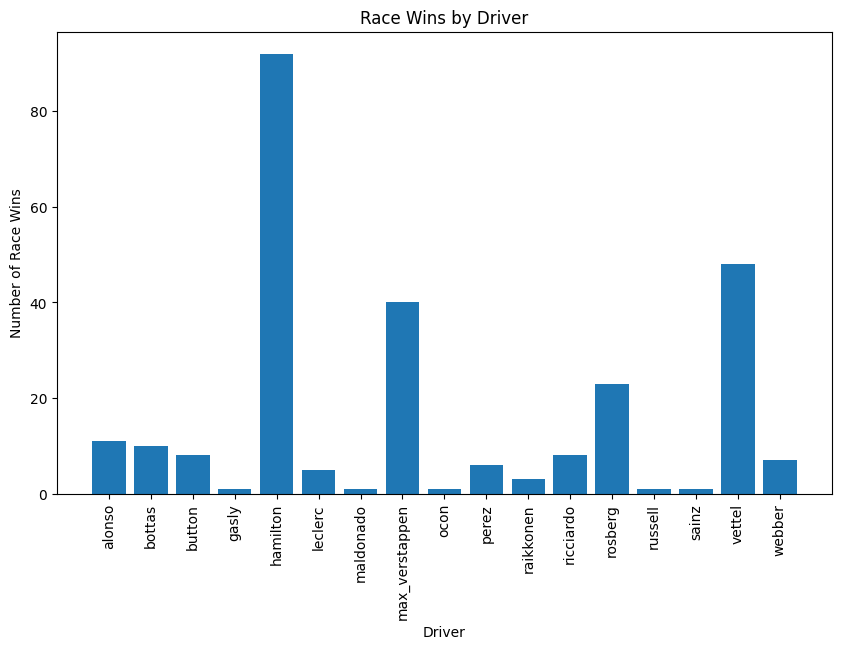

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(race_wins_count['driverRef'], race_wins_count['wins'])
plt.xlabel('Driver')
plt.ylabel('Number of Race Wins')
plt.title('Race Wins by Driver')
plt.xticks(rotation=90)
plt.show()

Lewis Hamilton has the most race wins (since 2010) at a peak of 92. Max Verstappen has been slowly growing over the last couple of years, and Sebastian Vettel has the 2nd most race wins.

Pole position converted to race win (2010 onwards)...

In [16]:
pole_position = df6[df6['grid'] == 1]
pole_position_count = pole_position.groupby('driverRef').size().reset_index(name='poles')
pole_position_count.sort_values('poles', ascending = False)

,driverRef,poles
3,hamilton,86
17,vettel,52
13,rosberg,30
8,max_verstappen,24
1,bottas,20
5,leclerc,19
18,webber,12
0,alonso,4
10,perez,3
12,ricciardo,3


In [17]:
driver_stats = pd.merge(pole_position_count, race_wins_count, on='driverRef', how='outer').fillna(0)
driver_stats = driver_stats.sort_values('poles', ascending=False)
driver_stats

,driverRef,poles,wins
3,hamilton,86.0,92.0
17,vettel,52.0,48.0
13,rosberg,30.0,23.0
8,max_verstappen,24.0,40.0
1,bottas,20.0,10.0
5,leclerc,19.0,5.0
18,webber,12.0,7.0
0,alonso,4.0,11.0
15,sainz,3.0,1.0
12,ricciardo,3.0,8.0


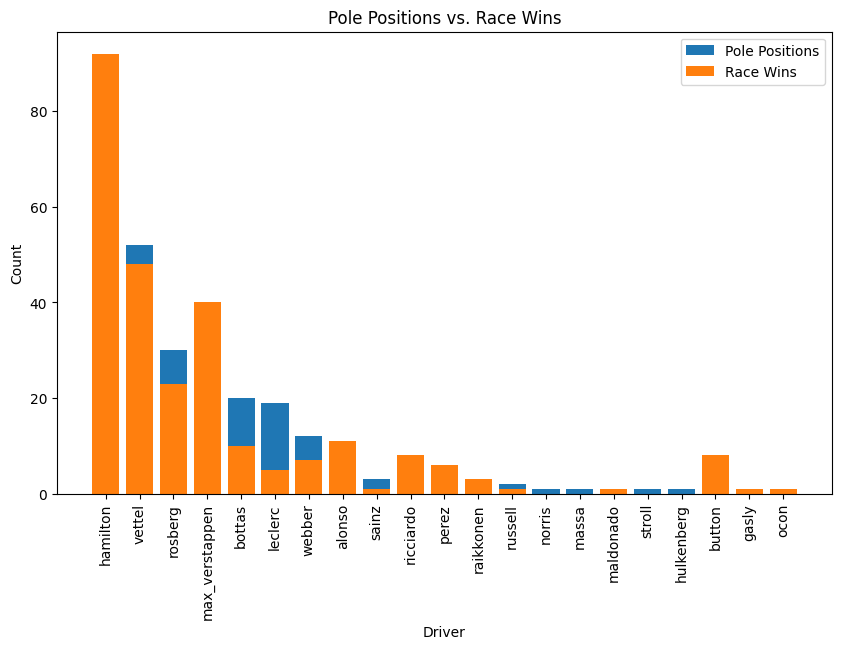

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(driver_stats['driverRef'], driver_stats['poles'], label='Pole Positions')
plt.bar(driver_stats['driverRef'], driver_stats['wins'], label='Race Wins')
plt.xlabel('Driver')
plt.ylabel('Count')
plt.title('Pole Positions vs. Race Wins')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Wins from outside of pole...

In [18]:
non_pole_wins = race_wins[race_wins['grid'] != 1]
non_pole_wins_count = non_pole_wins.groupby('driverRef').size().reset_index(name ='non_pole_wins')
non_pole_wins_count = non_pole_wins_count.sort_values('non_pole_wins', ascending = False)
non_pole_wins_count

,driverRef,non_pole_wins
4,hamilton,39
6,max_verstappen,21
12,vettel,21
0,alonso,8
11,rosberg,8
2,button,7
10,ricciardo,7
8,perez,5
1,bottas,4
13,webber,4


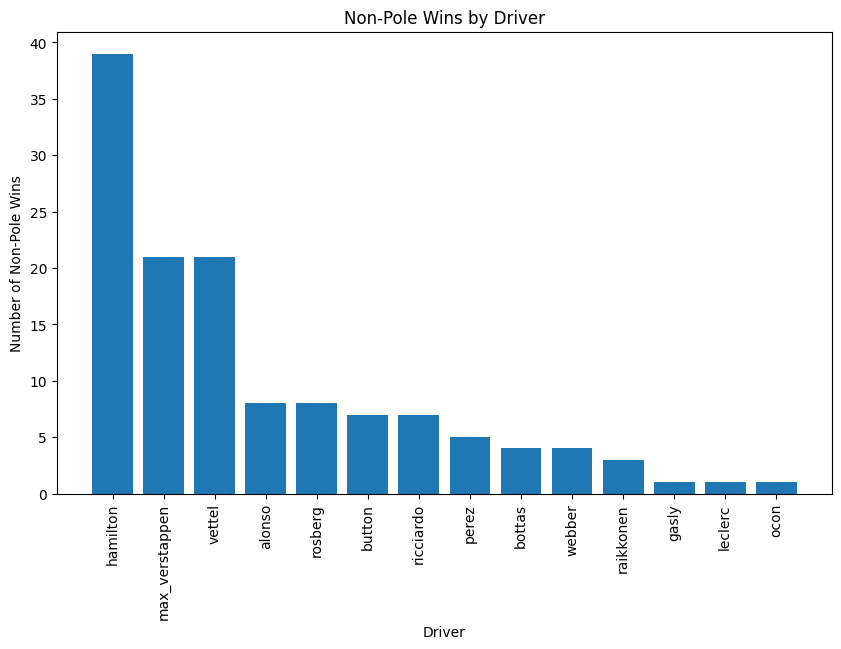

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(non_pole_wins_count['driverRef'], non_pole_wins_count['non_pole_wins'])
plt.xlabel('Driver')
plt.ylabel('Number of Non-Pole Wins')
plt.title('Non-Pole Wins by Driver')
plt.xticks(rotation=90)
plt.show()

What teams perform well in high altitude circuits?

In [ ]:
import numpy as np
df6['alt'] = df6['alt'].replace('\\N', np.nan)
df6['alt'] = df6['alt'].fillna(-999)

df6['alt'] = df6['alt'].astype(int)

df6['alt'] = df6['alt'].replace(-999, np.nan)

In [ ]:
high_alt_circuits = (df6['alt'] >= 500)
high_alt_teams = (df6['positionOrder'] == 1)


high_alt = df6[(high_alt_circuits & high_alt_teams)]
high_alt

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,...,driverRef,nationality,constructorRef,status,circuitRef,alt,circuit_info,q1,q2,q3
408,354,2010,18,18,Brazilian Grand Prix,2010-11-07,http://en.wikipedia.org/wiki/2010_Brazilian_Gr...,Clear; 25 °C (77 °F),20.0,9.0,...,vettel,German,red_bull,Finished,interlagos,785.0,Permanent racing facility,1:19.160,1:18.691,1:15.519
672,850,2011,10,20,German Grand Prix,2011-07-24,http://en.wikipedia.org/wiki/2011_German_Grand...,"Cloudy, (light) rain at start",1.0,1.0,...,hamilton,British,mclaren,Finished,nurburgring,578.0,Permanent racing facility,1:32.934,1:30.998,1:30.134
888,859,2011,19,18,Brazilian Grand Prix,2011-11-27,http://en.wikipedia.org/wiki/2011_Brazilian_Gr...,Fine\n\nAir Temp 24 °C (75 °F) Track Temp 43 ...,17.0,9.0,...,webber,Australian,red_bull,Finished,interlagos,785.0,Permanent racing facility,1:13.467,1:12.658,1:12.099
1368,879,2012,20,18,Brazilian Grand Prix,2012-11-25,http://en.wikipedia.org/wiki/2012_Brazilian_Gr...,"Race start: drops of rain, light rain shower g...",18.0,1.0,...,button,British,mclaren,Finished,interlagos,785.0,Permanent racing facility,1:15.456,1:13.515,1:12.513
1568,888,2013,9,20,German Grand Prix,2013-07-07,http://en.wikipedia.org/wiki/2013_German_Grand...,Sunny,20.0,9.0,...,vettel,German,red_bull,Finished,nurburgring,578.0,Permanent racing facility,1:31.269,1:29.992,1:29.501
1788,899,2013,19,18,Brazilian Grand Prix,2013-11-24,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,"Cloudy, Air Temp: 18°C",20.0,9.0,...,vettel,German,red_bull,Finished,interlagos,785.0,Permanent racing facility,1:25.381,1:26.420,1:26.479
1964,907,2014,8,70,Austrian Grand Prix,2014-06-22,http://en.wikipedia.org/wiki/2014_Austrian_Gra...,"Partially cloudy, hot and dry",3.0,131.0,...,rosberg,German,mercedes,Finished,red_bull_ring,678.0,Permanent racing facility,1:09.695,1:08.974,1:08.944
2179,917,2014,18,18,Brazilian Grand Prix,2014-11-09,http://en.wikipedia.org/wiki/2014_Brazilian_Gr...,"Sunny, Air: 23 to 24 °C (73 to 75 °F), Track: ...",3.0,131.0,...,rosberg,German,mercedes,Finished,interlagos,785.0,Permanent racing facility,1:10.347,1:10.303,1:10.023
2355,933,2015,8,70,Austrian Grand Prix,2015-06-21,http://en.wikipedia.org/wiki/2015_Austrian_Gra...,Cloudy14–15 °C (57–59 °F) air temperature27–32...,3.0,131.0,...,rosberg,German,mercedes,Finished,red_bull_ring,678.0,Permanent racing facility,1:10.976,1:08.634,1:08.655
2535,943,2015,17,32,Mexican Grand Prix,2015-11-01,http://en.wikipedia.org/wiki/2015_Mexican_Gran...,Partly cloudy22–24 °C (72–75 °F) air temperatu...,3.0,131.0,...,rosberg,German,mercedes,Finished,rodriguez,2227.0,Permanent racing facility,1:20.436,1:20.053,1:19.480


In [ ]:
high_alt_count = high_alt.groupby('constructorRef').size().reset_index(name ='high_alt_wins')
high_alt_count = high_alt_count.sort_values('high_alt_wins', ascending = False)
high_alt_count

,constructorRef,high_alt_wins
2,mercedes,16
3,red_bull,13
0,ferrari,2
1,mclaren,2


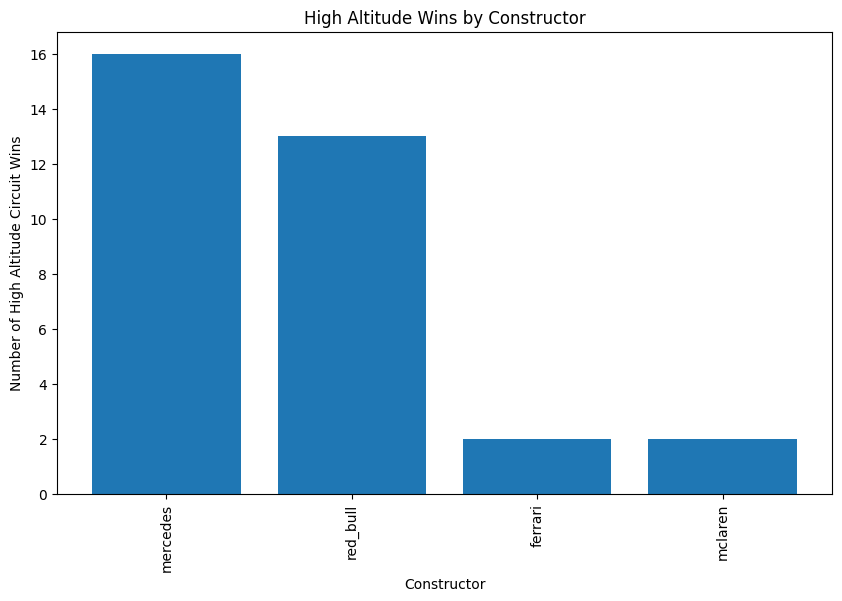

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(high_alt_count['constructorRef'], high_alt_count['high_alt_wins'])
plt.xlabel('Constructor')
plt.ylabel('Number of High Altitude Circuit Wins')
plt.title('High Altitude Wins by Constructor')
plt.xticks(rotation=90)
plt.show()

Mercedes has the most high altitude wins, followed by Red Bull Racing. Both Mercedes and Red Bull Racing have had a dominant era in Formula 1 since 2010, however this can also be an indication of how they set up their respective machinery in such circuits.

*The higher you are in the atmosphere, the thinner the air is. Because of the thin air, the drag of a Formula One car in high altitude circuits is much lower. This is why the cars are so fast on the straights in Mexico, with a maximum speed higher than Monza (350 km/h) whilst running wings as big as the ones used in Monaco. Aero grip is therefore pretty low in Mexico, but you can run a big wing without the penalty of drag, so top speeds are very high.*

As for Mercedes and Red Bull Racing, we know that their engines are the most powerful therefore giving them ultimate performance in these circuits. This is why a team like Mclaren may lack in pace since it runs a less powerful version of the Mercedes engine. Teams can run a much bulkier rear wing without the risk of losing top speed to nearby competitors.



Formula 1 advances towards more street circuits as the years go on, with Miami and Vegas being introduced in recent years. So, who really is the "King of the Streets" in modern day Formula 1?

In [ ]:
df6['circuit_info']

0       Permanent racing facility
1       Permanent racing facility
2       Permanent racing facility
3       Permanent racing facility
4       Permanent racing facility
                  ...            
5667                          NaN
5668                          NaN
5669                          NaN
5670                          NaN
5671                          NaN
Name: circuit_info, Length: 5672, dtype: object

In [10]:
street_circuits = ((df6['circuit_info'] ==  'Temporary street circuit') | (df6['circuit_info'] ==  'Street circuit') | (df6['circuit_info'] ==  'Street Circuit') | (df6['circuit_info'] ==  'Street circuit[4]'))
street_circuit_wins= (df6['positionOrder'] == 1)


street_wins = df6[(street_circuits & street_circuit_wins)]
street_wins

,raceId,year,round,circuitId,name,date,url,weather_info,driverId,constructorId,...,driverRef,nationality,constructorRef,status,circuitRef,alt,circuit_info,q1,q2,q3
24,338,2010,2,1,Australian Grand Prix,2010-03-28,http://en.wikipedia.org/wiki/2010_Australian_G...,Overcast with light rain at start,18.0,1.0,...,button,British,mclaren,Finished,albert_park,10,Temporary street circuit,1:24.897,1:24.531,1:24.675
120,342,2010,6,6,Monaco Grand Prix,2010-05-16,http://en.wikipedia.org/wiki/2010_Monaco_Grand...,"Mainly cloudy, dry",17.0,9.0,...,webber,Australian,red_bull,Finished,monaco,7,Street circuit,1:15.035,1:14.462,1:13.826
168,344,2010,8,7,Canadian Grand Prix,2010-06-13,http://en.wikipedia.org/wiki/2010_Canadian_Gra...,Warm with temperatures approaching 26 °C (79 °...,1.0,1.0,...,hamilton,British,mclaren,Finished,villeneuve,13,Street circuit,1:15.889,1:15.528,1:15.105
192,345,2010,9,12,European Grand Prix,2010-06-27,http://en.wikipedia.org/wiki/2010_European_Gra...,Dry[3],20.0,9.0,...,vettel,German,red_bull,Finished,valencia,4,Temporary street circuit,1:38.324,1:38.015,1:37.587
336,351,2010,15,15,Singapore Grand Prix,2010-09-26,http://en.wikipedia.org/wiki/2010_Singapore_Gr...,"Clear; Air temp 29 to 30 °C (84 to 86 °F), Tra...",4.0,6.0,...,alonso,Spanish,ferrari,Finished,marina_bay,18,Street Circuit,1:46.541,1:45.809,1:45.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,1091,2022,17,15,Singapore Grand Prix,2022-10-02,http://en.wikipedia.org/wiki/2022_Singapore_Gr...,Partly cloudy in a wet and drying track,815.0,9.0,...,perez,Mexican,red_bull,Finished,marina_bay,18,Temporary street circuit,1:54.404,1:52.818,1:49.434
5537,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,Clear,815.0,9.0,...,perez,Mexican,red_bull,Finished,jeddah,15,Street Circuit,1:29.244,1:28.635,1:28.265
5557,1100,2023,3,1,Australian Grand Prix,2023-04-02,https://en.wikipedia.org/wiki/2023_Australian_...,Sunny,830.0,9.0,...,max_verstappen,Dutch,red_bull,Finished,albert_park,10,Street Circuit,1:17.384,1:17.056,1:16.732
5577,1101,2023,4,73,Azerbaijan Grand Prix,2023-04-30,https://en.wikipedia.org/wiki/2023_Azerbaijan_...,Partly cloudy,815.0,9.0,...,perez,Mexican,red_bull,Finished,baku,-7,Street circuit,1:41.756,1:41.131,1:40.495


In [11]:
street_wins_count = street_wins.groupby('driverRef').size().reset_index(name ='street_circuit_wins')
street_wins_count = street_wins_count.sort_values('street_circuit_wins', ascending = False)
street_wins_count

,driverRef,street_circuit_wins
3,hamilton,15
10,vettel,14
9,rosberg,7
5,max_verstappen,6
6,perez,5
2,button,3
8,ricciardo,3
0,alonso,2
1,bottas,2
11,webber,2


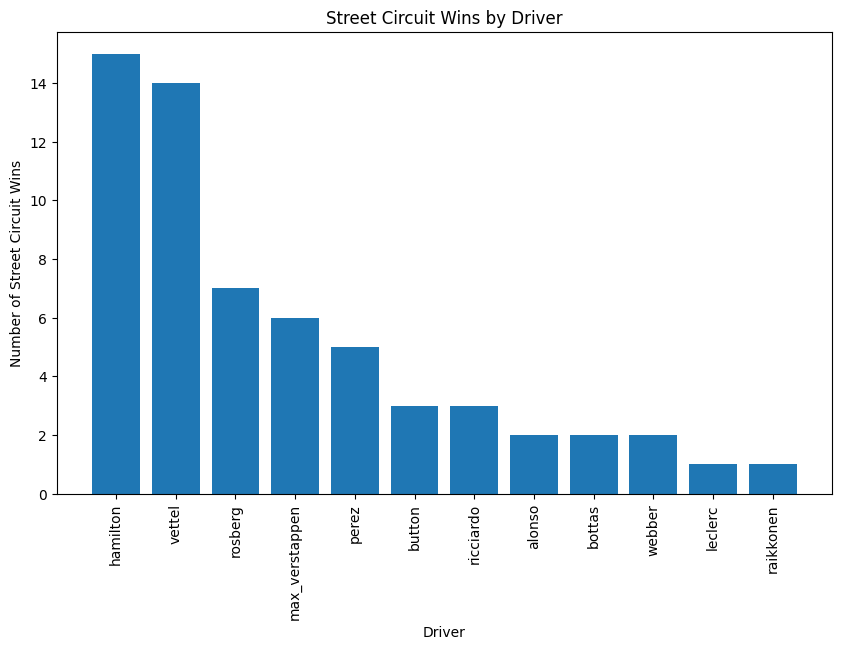

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(street_wins_count['driverRef'], street_wins_count['street_circuit_wins'])
plt.xlabel('Driver')
plt.ylabel('Number of Street Circuit Wins')
plt.title('Street Circuit Wins by Driver')
plt.xticks(rotation=90)
plt.show()

In [19]:
race_wins_count
wins_comparison = pd.merge(street_wins_count, race_wins_count, on='driverRef', how='left')

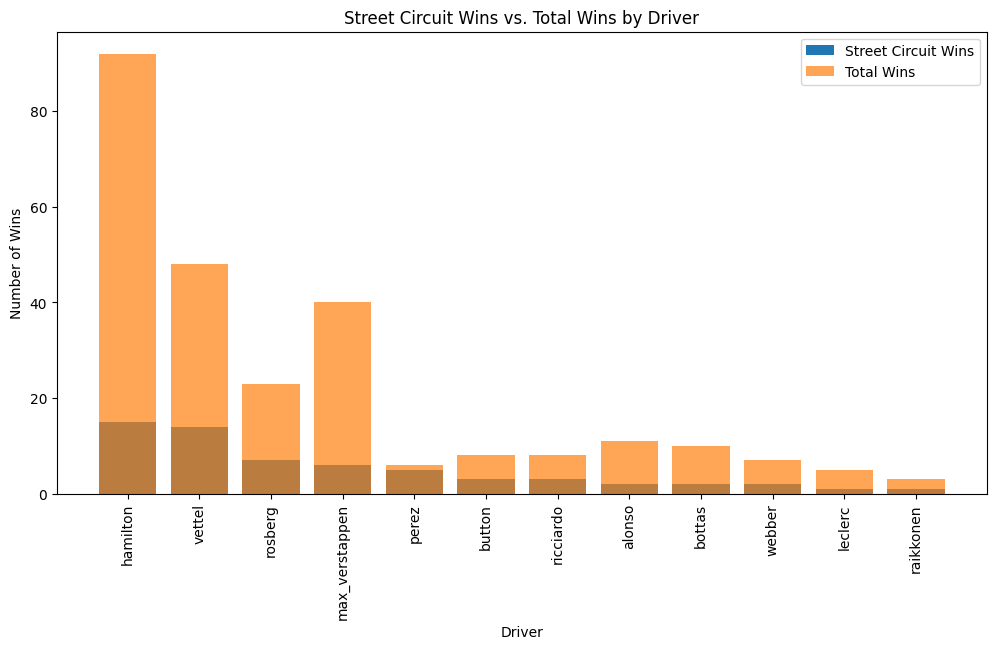

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(wins_comparison['driverRef'], wins_comparison['street_circuit_wins'], label='Street Circuit Wins')
plt.bar(wins_comparison['driverRef'], wins_comparison['wins'], label='Total Wins', alpha=0.7)
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Street Circuit Wins vs. Total Wins by Driver')
plt.xticks(rotation=90)
plt.legend()
plt.show()

As we can see, Perez is the most impressive street circuit driver, with 4 of 5 race wins being on street circuits. However, we cannot completely draw conclusions from this data as there are other factors that influece race wins.However, there is a correlation between Perez and street circuits, showing that he enjoys driving around tight, narrow circuits and is able to get the maximum out of the car. A lot of other drivers are also good around street circuits, such as Hamilton and Vettel. Although Perez's street circuit stats are impressive, it also shows that Perez is not that strong around regular racing circuits as he only has 1 win out of 5 on a normal circuit.

More data collection (will be used for modeling later)...

In [ ]:
df6 = df6[df6['year'] <= 2022] #2023 is still an incomplete season, so that data will not be useful for our model

**Data cleaning...**

Processing weather data...

In [ ]:
df6['weather_info'].unique()

array(['Sunny', 'Overcast with light rain at start', 'Mainly cloudy, dry',
       'Cloudy, rain',
       'Air: 28 to 29\xa0°C (82 to 84\xa0°F) Track: 39 to 49\xa0°C (102 to 120\xa0°F)',
       'Warm with temperatures approaching 26\xa0°C (79\xa0°F); wind speeds up to 4.9 kilometres per hour (3.0\xa0mph)[1]',
       'Dry[3]', 'Mainly sunny', 'Mainly cloudy, dry[4]',
       'Mainly sunny28\xa0°C (82\xa0°F)[1]', 'Intermittent rain',
       'Clear; Air temp 29 to 30\xa0°C (84 to 86\xa0°F), Track temp 31\xa0°C (88\xa0°F)[5][6]',
       'Rain. Air 20\xa0°C (68\xa0°F), Track 18\xa0°C (64\xa0°F)',
       'Clear; 25\xa0°C (77\xa0°F)',
       'Dry[3]\nAir Temp 28\xa0°C (82\xa0°F)[3]\n\nTrack Temp 33\xa0°C (91\xa0°F) dropping to 29\xa0°C (84\xa0°F)[3]',
       'Sunny, 18°C', 'Cloudy, dry',
       'Fine and Dry[1]\nAir Temp 22\xa0°C (72\xa0°F)[1]\n\nTrack Temp 32\xa0°C (90\xa0°F) dropping to 26\xa0°C (79\xa0°F)[1]',
       'Sunny, Fine and Dry[2]\nAir Temp 17\xa0°C (63\xa0°F)[2]\n\nTrack Temp 35\x

In [ ]:
weather = df6

In [ ]:
default_weather_value = 'Unknown'
df6['weather_info'].fillna(default_weather_value, inplace=True)

<ipython-input-54-c94994204b85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['weather_info'].fillna(default_weather_value, inplace=True)


In [ ]:
weather_dict = {'weather_warm': ['sunny', 'clear', 'warm', 'hot', 'hazy', 'mild', 'humid', ],
               'weather_dry': ['dry', 'fine', 'wind', 'air'],
               'weather_wet': ['showers', 'wet', 'rain',  'thunderstorms', 'rainy', 'drizzle'],
               'weather_cloudy': ['overcast',  'clouds', 'cloudy', 'cloudy', 'cloud']}

In [ ]:
def map_weather_to_category(weather):
    for category, keywords in weather_dict.items():
        if any(keyword in weather.lower() for keyword in keywords):
            return category
    return weather  # If none of the categories match, assign it to 'Other'


In [ ]:
columns_to_remove = ['date', 'url', 'nationality',  'fastestLapSpeed', 'fastestLapTime', 'points']

weather.drop(columns = columns_to_remove, axis=1, inplace=True)

<ipython-input-57-47175456ee9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.drop(columns = columns_to_remove, axis=1, inplace=True)


In [ ]:
weather['weather_category'] = weather['weather_info'].apply(map_weather_to_category)
weather

<ipython-input-58-df28a2c10062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['weather_category'] = weather['weather_info'].apply(map_weather_to_category)


,raceId,year,round,circuitId,name,weather_info,driverId,constructorId,number,grid,...,driverRef,constructorRef,status,circuitRef,alt,circuit_info,q1,q2,q3,weather_category
0,337,2010,1,3,Bahrain Grand Prix,Sunny,4.0,6.0,8.0,3.0,...,alonso,ferrari,Finished,bahrain,7.0,Permanent racing facility,1:54.612,1:54.172,1:54.608,weather_warm
1,337,2010,1,3,Bahrain Grand Prix,Sunny,13.0,6.0,7.0,2.0,...,massa,ferrari,Finished,bahrain,7.0,Permanent racing facility,1:55.313,1:54.331,1:54.242,weather_warm
2,337,2010,1,3,Bahrain Grand Prix,Sunny,1.0,1.0,2.0,4.0,...,hamilton,mclaren,Finished,bahrain,7.0,Permanent racing facility,1:55.341,1:54.707,1:55.217,weather_warm
3,337,2010,1,3,Bahrain Grand Prix,Sunny,20.0,9.0,5.0,1.0,...,vettel,red_bull,Finished,bahrain,7.0,Permanent racing facility,1:55.029,1:53.883,1:54.101,weather_warm
4,337,2010,1,3,Bahrain Grand Prix,Sunny,3.0,131.0,4.0,5.0,...,rosberg,mercedes,Finished,bahrain,7.0,Permanent racing facility,1:55.463,1:54.682,1:55.241,weather_warm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,854.0,210.0,47.0,12.0,...,mick_schumacher,haas,+1 Lap,yas_marina,3.0,Permanent racing facility,1:25.711,1:25.225,\N,weather_warm
5513,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,825.0,210.0,20.0,16.0,...,kevin_magnussen,haas,+1 Lap,yas_marina,3.0,Permanent racing facility,1:25.834,\N,\N,weather_warm
5514,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,1.0,131.0,44.0,5.0,...,hamilton,mercedes,Hydraulics,yas_marina,3.0,Permanent racing facility,1:25.594,1:24.774,1:24.508,weather_warm
5515,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,849.0,3.0,6.0,20.0,...,latifi,williams,Collision damage,yas_marina,3.0,Permanent racing facility,1:26.054,\N,\N,weather_warm


In [ ]:
#One-hot encode weather data
weather_encoded = pd.get_dummies(weather['weather_category'])



In [ ]:
merged_data = pd.concat([df6, weather_encoded], axis=1)
merged_data

,raceId,year,round,circuitId,name,weather_info,driverId,constructorId,number,grid,...,alt,circuit_info,q1,q2,q3,weather_category,weather_cloudy,weather_dry,weather_warm,weather_wet
0,337,2010,1,3,Bahrain Grand Prix,Sunny,4.0,6.0,8.0,3.0,...,7.0,Permanent racing facility,1:54.612,1:54.172,1:54.608,weather_warm,0,0,1,0
1,337,2010,1,3,Bahrain Grand Prix,Sunny,13.0,6.0,7.0,2.0,...,7.0,Permanent racing facility,1:55.313,1:54.331,1:54.242,weather_warm,0,0,1,0
2,337,2010,1,3,Bahrain Grand Prix,Sunny,1.0,1.0,2.0,4.0,...,7.0,Permanent racing facility,1:55.341,1:54.707,1:55.217,weather_warm,0,0,1,0
3,337,2010,1,3,Bahrain Grand Prix,Sunny,20.0,9.0,5.0,1.0,...,7.0,Permanent racing facility,1:55.029,1:53.883,1:54.101,weather_warm,0,0,1,0
4,337,2010,1,3,Bahrain Grand Prix,Sunny,3.0,131.0,4.0,5.0,...,7.0,Permanent racing facility,1:55.463,1:54.682,1:55.241,weather_warm,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,854.0,210.0,47.0,12.0,...,3.0,Permanent racing facility,1:25.711,1:25.225,\N,weather_warm,0,0,1,0
5513,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,825.0,210.0,20.0,16.0,...,3.0,Permanent racing facility,1:25.834,\N,\N,weather_warm,0,0,1,0
5514,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,1.0,131.0,44.0,5.0,...,3.0,Permanent racing facility,1:25.594,1:24.774,1:24.508,weather_warm,0,0,1,0
5515,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,849.0,3.0,6.0,20.0,...,3.0,Permanent racing facility,1:26.054,\N,\N,weather_warm,0,0,1,0


Weather data is now processed and encoded.

In [ ]:
merged_data.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'weather_info',
       'driverId', 'constructorId', 'number', 'grid', 'positionText',
       'positionOrder', 'statusId', 'driverRef', 'constructorRef', 'status',
       'circuitRef', 'alt', 'circuit_info', 'q1', 'q2', 'q3',
       'weather_category', 'weather_cloudy', 'weather_dry', 'weather_warm',
       'weather_wet'],
      dtype='object')

Transforming status...

In [ ]:
df6['status'].unique()

array(['Finished', '+1 Lap', '+2 Laps', 'Electrical', 'Hydraulics',
       'Overheating', 'Gearbox', 'Suspension', 'Accident', '+5 Laps',
       'Wheel', 'Engine', 'Spun off', 'Collision', '+3 Laps', '+4 Laps',
       '+10 Laps', 'Throttle', 'Clutch', 'Technical', 'Puncture',
       'Brakes', 'Steering', 'Track rod', 'Front wing', 'Fuel pump',
       'Fuel pressure', 'Mechanical', 'Exhaust', 'Driveshaft', 'Retired',
       'Oil leak', '+6 Laps', '+9 Laps', 'Rear wing', 'Transmission',
       'Water leak', 'Disqualified', 'Did not qualify', '+42 Laps',
       'Engine misfire', 'Injury', 'Wheel nut', 'Heat shield fire',
       '+14 Laps', 'Vibrations', 'Electronics', 'Withdrew', '+11 Laps',
       'Alternator', 'Collision damage', 'Fuel system', 'Tyre',
       'Water pressure', 'Pneumatics', '+8 Laps', 'ERS', 'Oil pressure',
       'Power Unit', 'Turbo', 'Drivetrain', 'Power loss', 'Brake duct',
       'Excluded', 'Battery', 'Seat', 'Spark plugs', 'Damage',
       'Out of fuel', 'Debris'

In [ ]:
merged_data['status_outcome'] = merged_data['status'].apply(lambda x: 1 if x == 'Finished' else 0)
merged_data

,raceId,year,round,circuitId,name,weather_info,driverId,constructorId,number,grid,...,circuit_info,q1,q2,q3,weather_category,weather_cloudy,weather_dry,weather_warm,weather_wet,status_outcome
0,337,2010,1,3,Bahrain Grand Prix,Sunny,4.0,6.0,8.0,3.0,...,Permanent racing facility,1:54.612,1:54.172,1:54.608,weather_warm,0,0,1,0,1
1,337,2010,1,3,Bahrain Grand Prix,Sunny,13.0,6.0,7.0,2.0,...,Permanent racing facility,1:55.313,1:54.331,1:54.242,weather_warm,0,0,1,0,1
2,337,2010,1,3,Bahrain Grand Prix,Sunny,1.0,1.0,2.0,4.0,...,Permanent racing facility,1:55.341,1:54.707,1:55.217,weather_warm,0,0,1,0,1
3,337,2010,1,3,Bahrain Grand Prix,Sunny,20.0,9.0,5.0,1.0,...,Permanent racing facility,1:55.029,1:53.883,1:54.101,weather_warm,0,0,1,0,1
4,337,2010,1,3,Bahrain Grand Prix,Sunny,3.0,131.0,4.0,5.0,...,Permanent racing facility,1:55.463,1:54.682,1:55.241,weather_warm,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,854.0,210.0,47.0,12.0,...,Permanent racing facility,1:25.711,1:25.225,\N,weather_warm,0,0,1,0,0
5513,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,825.0,210.0,20.0,16.0,...,Permanent racing facility,1:25.834,\N,\N,weather_warm,0,0,1,0,0
5514,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,1.0,131.0,44.0,5.0,...,Permanent racing facility,1:25.594,1:24.774,1:24.508,weather_warm,0,0,1,0,0
5515,1096,2022,22,24,Abu Dhabi Grand Prix,Clear,849.0,3.0,6.0,20.0,...,Permanent racing facility,1:26.054,\N,\N,weather_warm,0,0,1,0,0


In [ ]:
#Remove previous weather + status info now that we have encoded the info
columnsremove = ['statusId', 'status', 'weather_category', 'weather_info']
merged_data.drop(columnsremove, axis=1, inplace=True)
merged_data

,raceId,year,round,circuitId,name,driverId,constructorId,number,grid,positionText,...,alt,circuit_info,q1,q2,q3,weather_cloudy,weather_dry,weather_warm,weather_wet,status_outcome
0,337,2010,1,3,Bahrain Grand Prix,4.0,6.0,8.0,3.0,1,...,7.0,Permanent racing facility,1:54.612,1:54.172,1:54.608,0,0,1,0,1
1,337,2010,1,3,Bahrain Grand Prix,13.0,6.0,7.0,2.0,2,...,7.0,Permanent racing facility,1:55.313,1:54.331,1:54.242,0,0,1,0,1
2,337,2010,1,3,Bahrain Grand Prix,1.0,1.0,2.0,4.0,3,...,7.0,Permanent racing facility,1:55.341,1:54.707,1:55.217,0,0,1,0,1
3,337,2010,1,3,Bahrain Grand Prix,20.0,9.0,5.0,1.0,4,...,7.0,Permanent racing facility,1:55.029,1:53.883,1:54.101,0,0,1,0,1
4,337,2010,1,3,Bahrain Grand Prix,3.0,131.0,4.0,5.0,5,...,7.0,Permanent racing facility,1:55.463,1:54.682,1:55.241,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,24,Abu Dhabi Grand Prix,854.0,210.0,47.0,12.0,16,...,3.0,Permanent racing facility,1:25.711,1:25.225,\N,0,0,1,0,0
5513,1096,2022,22,24,Abu Dhabi Grand Prix,825.0,210.0,20.0,16.0,17,...,3.0,Permanent racing facility,1:25.834,\N,\N,0,0,1,0,0
5514,1096,2022,22,24,Abu Dhabi Grand Prix,1.0,131.0,44.0,5.0,18,...,3.0,Permanent racing facility,1:25.594,1:24.774,1:24.508,0,0,1,0,0
5515,1096,2022,22,24,Abu Dhabi Grand Prix,849.0,3.0,6.0,20.0,19,...,3.0,Permanent racing facility,1:26.054,\N,\N,0,0,1,0,0


Transforming circuit name...

In [ ]:
merged_data['circuitRef'].unique()

array(['bahrain', 'albert_park', 'sepang', 'shanghai', 'catalunya',
       'monaco', 'istanbul', 'villeneuve', 'valencia', 'silverstone',
       'hockenheimring', 'hungaroring', 'spa', 'monza', 'marina_bay',
       'suzuka', 'yeongam', 'interlagos', 'yas_marina', 'nurburgring',
       'buddh', 'americas', 'red_bull_ring', 'sochi', 'rodriguez', 'baku',
       'ricard', 'mugello', 'portimao', 'imola', 'losail', 'zandvoort',
       'jeddah', 'miami'], dtype=object)

In [ ]:
circuit_encoded = pd.get_dummies(merged_data['circuitRef'], prefix='circuit')
merged_data = pd.concat([merged_data, circuit_encoded], axis=1)
merged_data

,raceId,year,round,circuitId,name,driverId,constructorId,number,grid,positionText,...,circuit_shanghai,circuit_silverstone,circuit_sochi,circuit_spa,circuit_suzuka,circuit_valencia,circuit_villeneuve,circuit_yas_marina,circuit_yeongam,circuit_zandvoort
0,337,2010,1,3,Bahrain Grand Prix,4.0,6.0,8.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
1,337,2010,1,3,Bahrain Grand Prix,13.0,6.0,7.0,2.0,2,...,0,0,0,0,0,0,0,0,0,0
2,337,2010,1,3,Bahrain Grand Prix,1.0,1.0,2.0,4.0,3,...,0,0,0,0,0,0,0,0,0,0
3,337,2010,1,3,Bahrain Grand Prix,20.0,9.0,5.0,1.0,4,...,0,0,0,0,0,0,0,0,0,0
4,337,2010,1,3,Bahrain Grand Prix,3.0,131.0,4.0,5.0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,24,Abu Dhabi Grand Prix,854.0,210.0,47.0,12.0,16,...,0,0,0,0,0,0,0,1,0,0
5513,1096,2022,22,24,Abu Dhabi Grand Prix,825.0,210.0,20.0,16.0,17,...,0,0,0,0,0,0,0,1,0,0
5514,1096,2022,22,24,Abu Dhabi Grand Prix,1.0,131.0,44.0,5.0,18,...,0,0,0,0,0,0,0,1,0,0
5515,1096,2022,22,24,Abu Dhabi Grand Prix,849.0,3.0,6.0,20.0,19,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Remove previous circuitRef info now that we have encoded the info
columnsremove = ['circuitId', 'circuitRef']
merged_data.drop(columnsremove, axis=1, inplace=True)
merged_data

,raceId,year,round,name,driverId,constructorId,number,grid,positionText,positionOrder,...,circuit_shanghai,circuit_silverstone,circuit_sochi,circuit_spa,circuit_suzuka,circuit_valencia,circuit_villeneuve,circuit_yas_marina,circuit_yeongam,circuit_zandvoort
0,337,2010,1,Bahrain Grand Prix,4.0,6.0,8.0,3.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,337,2010,1,Bahrain Grand Prix,13.0,6.0,7.0,2.0,2,2.0,...,0,0,0,0,0,0,0,0,0,0
2,337,2010,1,Bahrain Grand Prix,1.0,1.0,2.0,4.0,3,3.0,...,0,0,0,0,0,0,0,0,0,0
3,337,2010,1,Bahrain Grand Prix,20.0,9.0,5.0,1.0,4,4.0,...,0,0,0,0,0,0,0,0,0,0
4,337,2010,1,Bahrain Grand Prix,3.0,131.0,4.0,5.0,5,5.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,Abu Dhabi Grand Prix,854.0,210.0,47.0,12.0,16,16.0,...,0,0,0,0,0,0,0,1,0,0
5513,1096,2022,22,Abu Dhabi Grand Prix,825.0,210.0,20.0,16.0,17,17.0,...,0,0,0,0,0,0,0,1,0,0
5514,1096,2022,22,Abu Dhabi Grand Prix,1.0,131.0,44.0,5.0,18,18.0,...,0,0,0,0,0,0,0,1,0,0
5515,1096,2022,22,Abu Dhabi Grand Prix,849.0,3.0,6.0,20.0,19,19.0,...,0,0,0,0,0,0,0,1,0,0


Transforming circuit info... (what type of circuit)

In [ ]:
merged_data['circuit_info'].unique()

array(['Permanent racing facility', 'Temporary street circuit',
       'Street circuit', 'Street Circuit', 'Korea International Circuit',
       'Yas Marina Circuit', 'Korea International Circuit[1]',
       'Street circuit[4]', 'Semi-permanent racing facility[3]',
       'Permanent Racing Facility', 'Permanent racing circuit',
       'Purpose-built temporary circuit'], dtype=object)

In [ ]:
circuit_info_mapping = {
    'Permanent racing facility': 'Racing circuit',
    'Temporary street circuit': 'Street circuit',
    'Street circuit': 'Street circuit',
    'Street Circuit': 'Street circuit',
    'Korea International Circuit': 'Racing circuit',
    'Yas Marina Circuit': 'Racing circuit',
    'Korea International Circuit[1]': 'Racing circuit',
    'Street circuit[4]': 'Street circuit',
    'Semi-permanent racing facility[3]': 'Racing circuit',
    'Permanent Racing Facility': 'Racing circuit',
    'Permanent racing circuit': 'Racing circuit'
}

In [ ]:
merged_data['circuit_category'] = merged_data['circuit_info'].map(circuit_info_mapping)
merged_data

,raceId,year,round,name,driverId,constructorId,number,grid,positionText,positionOrder,...,circuit_silverstone,circuit_sochi,circuit_spa,circuit_suzuka,circuit_valencia,circuit_villeneuve,circuit_yas_marina,circuit_yeongam,circuit_zandvoort,circuit_category
0,337,2010,1,Bahrain Grand Prix,4.0,6.0,8.0,3.0,1,1.0,...,0,0,0,0,0,0,0,0,0,Racing circuit
1,337,2010,1,Bahrain Grand Prix,13.0,6.0,7.0,2.0,2,2.0,...,0,0,0,0,0,0,0,0,0,Racing circuit
2,337,2010,1,Bahrain Grand Prix,1.0,1.0,2.0,4.0,3,3.0,...,0,0,0,0,0,0,0,0,0,Racing circuit
3,337,2010,1,Bahrain Grand Prix,20.0,9.0,5.0,1.0,4,4.0,...,0,0,0,0,0,0,0,0,0,Racing circuit
4,337,2010,1,Bahrain Grand Prix,3.0,131.0,4.0,5.0,5,5.0,...,0,0,0,0,0,0,0,0,0,Racing circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,Abu Dhabi Grand Prix,854.0,210.0,47.0,12.0,16,16.0,...,0,0,0,0,0,0,1,0,0,Racing circuit
5513,1096,2022,22,Abu Dhabi Grand Prix,825.0,210.0,20.0,16.0,17,17.0,...,0,0,0,0,0,0,1,0,0,Racing circuit
5514,1096,2022,22,Abu Dhabi Grand Prix,1.0,131.0,44.0,5.0,18,18.0,...,0,0,0,0,0,0,1,0,0,Racing circuit
5515,1096,2022,22,Abu Dhabi Grand Prix,849.0,3.0,6.0,20.0,19,19.0,...,0,0,0,0,0,0,1,0,0,Racing circuit


In [ ]:
circuit_encoded = pd.get_dummies(merged_data['circuit_category'], prefix='type')
merged_data = pd.concat([merged_data, circuit_encoded], axis=1)
merged_data.drop(['circuit_info', 'circuit_category'], axis=1, inplace=True)
merged_data

,raceId,year,round,name,driverId,constructorId,number,grid,positionText,positionOrder,...,circuit_sochi,circuit_spa,circuit_suzuka,circuit_valencia,circuit_villeneuve,circuit_yas_marina,circuit_yeongam,circuit_zandvoort,type_Racing circuit,type_Street circuit
0,337,2010,1,Bahrain Grand Prix,4.0,6.0,8.0,3.0,1,1.0,...,0,0,0,0,0,0,0,0,1,0
1,337,2010,1,Bahrain Grand Prix,13.0,6.0,7.0,2.0,2,2.0,...,0,0,0,0,0,0,0,0,1,0
2,337,2010,1,Bahrain Grand Prix,1.0,1.0,2.0,4.0,3,3.0,...,0,0,0,0,0,0,0,0,1,0
3,337,2010,1,Bahrain Grand Prix,20.0,9.0,5.0,1.0,4,4.0,...,0,0,0,0,0,0,0,0,1,0
4,337,2010,1,Bahrain Grand Prix,3.0,131.0,4.0,5.0,5,5.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,1096,2022,22,Abu Dhabi Grand Prix,854.0,210.0,47.0,12.0,16,16.0,...,0,0,0,0,0,1,0,0,1,0
5513,1096,2022,22,Abu Dhabi Grand Prix,825.0,210.0,20.0,16.0,17,17.0,...,0,0,0,0,0,1,0,0,1,0
5514,1096,2022,22,Abu Dhabi Grand Prix,1.0,131.0,44.0,5.0,18,18.0,...,0,0,0,0,0,1,0,0,1,0
5515,1096,2022,22,Abu Dhabi Grand Prix,849.0,3.0,6.0,20.0,19,19.0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#Drop extra columns
columnsremove = ['number','positionText','constructorId','raceId','driverId']
merged_data.drop(columns = columnsremove, axis = 1, inplace = True)
merged_data

,year,round,name,grid,positionOrder,driverRef,constructorRef,alt,q1,q2,...,circuit_sochi,circuit_spa,circuit_suzuka,circuit_valencia,circuit_villeneuve,circuit_yas_marina,circuit_yeongam,circuit_zandvoort,type_Racing circuit,type_Street circuit
0,2010,1,Bahrain Grand Prix,3.0,1.0,alonso,ferrari,7.0,1:54.612,1:54.172,...,0,0,0,0,0,0,0,0,1,0
1,2010,1,Bahrain Grand Prix,2.0,2.0,massa,ferrari,7.0,1:55.313,1:54.331,...,0,0,0,0,0,0,0,0,1,0
2,2010,1,Bahrain Grand Prix,4.0,3.0,hamilton,mclaren,7.0,1:55.341,1:54.707,...,0,0,0,0,0,0,0,0,1,0
3,2010,1,Bahrain Grand Prix,1.0,4.0,vettel,red_bull,7.0,1:55.029,1:53.883,...,0,0,0,0,0,0,0,0,1,0
4,2010,1,Bahrain Grand Prix,5.0,5.0,rosberg,mercedes,7.0,1:55.463,1:54.682,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,Abu Dhabi Grand Prix,12.0,16.0,mick_schumacher,haas,3.0,1:25.711,1:25.225,...,0,0,0,0,0,1,0,0,1,0
5513,2022,22,Abu Dhabi Grand Prix,16.0,17.0,kevin_magnussen,haas,3.0,1:25.834,\N,...,0,0,0,0,0,1,0,0,1,0
5514,2022,22,Abu Dhabi Grand Prix,5.0,18.0,hamilton,mercedes,3.0,1:25.594,1:24.774,...,0,0,0,0,0,1,0,0,1,0
5515,2022,22,Abu Dhabi Grand Prix,20.0,19.0,latifi,williams,3.0,1:26.054,\N,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
merged_data.columns

Index(['year', 'round', 'name', 'grid', 'positionOrder', 'driverRef',
       'constructorRef', 'alt', 'q1', 'q2', 'q3', 'weather_cloudy',
       'weather_dry', 'weather_warm', 'weather_wet', 'status_outcome',
       'circuit_albert_park', 'circuit_americas', 'circuit_bahrain',
       'circuit_baku', 'circuit_buddh', 'circuit_catalunya',
       'circuit_hockenheimring', 'circuit_hungaroring', 'circuit_imola',
       'circuit_interlagos', 'circuit_istanbul', 'circuit_jeddah',
       'circuit_losail', 'circuit_marina_bay', 'circuit_miami',
       'circuit_monaco', 'circuit_monza', 'circuit_mugello',
       'circuit_nurburgring', 'circuit_portimao', 'circuit_red_bull_ring',
       'circuit_ricard', 'circuit_rodriguez', 'circuit_sepang',
       'circuit_shanghai', 'circuit_silverstone', 'circuit_sochi',
       'circuit_spa', 'circuit_suzuka', 'circuit_valencia',
       'circuit_villeneuve', 'circuit_yas_marina', 'circuit_yeongam',
       'circuit_zandvoort', 'type_Racing circuit', 'type_Str

Transforming race name info...

In [ ]:
merged_data['name'].unique()

array(['Bahrain Grand Prix', 'Australian Grand Prix',
       'Malaysian Grand Prix', 'Chinese Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'Canadian Grand Prix',
       'European Grand Prix', 'British Grand Prix', 'German Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix', 'Korean Grand Prix',
       'Brazilian Grand Prix', 'Abu Dhabi Grand Prix',
       'Indian Grand Prix', 'United States Grand Prix',
       'Austrian Grand Prix', 'Russian Grand Prix', 'Mexican Grand Prix',
       'Azerbaijan Grand Prix', 'French Grand Prix', 'Styrian Grand Prix',
       '70th Anniversary Grand Prix', 'Tuscan Grand Prix',
       'Eifel Grand Prix', 'Portuguese Grand Prix',
       'Emilia Romagna Grand Prix', 'Sakhir Grand Prix',
       'Qatar Grand Prix', 'Dutch Grand Prix', 'Mexico City Grand Prix',
       'São Paulo Grand Prix', 'Saudi Arabian Grand Prix',
       'Miami G

In [ ]:
name_encoded = pd.get_dummies(merged_data['name'], prefix='name')
merged_data = pd.concat([merged_data, name_encoded], axis=1)
merged_data

,year,round,name,grid,positionOrder,driverRef,constructorRef,alt,q1,q2,...,name_Russian Grand Prix,name_Sakhir Grand Prix,name_Saudi Arabian Grand Prix,name_Singapore Grand Prix,name_Spanish Grand Prix,name_Styrian Grand Prix,name_São Paulo Grand Prix,name_Turkish Grand Prix,name_Tuscan Grand Prix,name_United States Grand Prix
0,2010,1,Bahrain Grand Prix,3.0,1.0,alonso,ferrari,7.0,1:54.612,1:54.172,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,Bahrain Grand Prix,2.0,2.0,massa,ferrari,7.0,1:55.313,1:54.331,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,Bahrain Grand Prix,4.0,3.0,hamilton,mclaren,7.0,1:55.341,1:54.707,...,0,0,0,0,0,0,0,0,0,0
3,2010,1,Bahrain Grand Prix,1.0,4.0,vettel,red_bull,7.0,1:55.029,1:53.883,...,0,0,0,0,0,0,0,0,0,0
4,2010,1,Bahrain Grand Prix,5.0,5.0,rosberg,mercedes,7.0,1:55.463,1:54.682,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,Abu Dhabi Grand Prix,12.0,16.0,mick_schumacher,haas,3.0,1:25.711,1:25.225,...,0,0,0,0,0,0,0,0,0,0
5513,2022,22,Abu Dhabi Grand Prix,16.0,17.0,kevin_magnussen,haas,3.0,1:25.834,\N,...,0,0,0,0,0,0,0,0,0,0
5514,2022,22,Abu Dhabi Grand Prix,5.0,18.0,hamilton,mercedes,3.0,1:25.594,1:24.774,...,0,0,0,0,0,0,0,0,0,0
5515,2022,22,Abu Dhabi Grand Prix,20.0,19.0,latifi,williams,3.0,1:26.054,\N,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_data.drop('name', axis = 1, inplace = True)

**More processing + cleaning...**

In [ ]:
nan_column = merged_data['alt'].isna()
nan_column.unique()

array([False,  True])

In [ ]:
rows_with_nan = merged_data[merged_data['alt'].isna()]
rows_with_nan

,year,round,grid,positionOrder,driverRef,constructorRef,alt,q1,q2,q3,...,name_Russian Grand Prix,name_Sakhir Grand Prix,name_Saudi Arabian Grand Prix,name_Singapore Grand Prix,name_Spanish Grand Prix,name_Styrian Grand Prix,name_São Paulo Grand Prix,name_Turkish Grand Prix,name_Tuscan Grand Prix,name_United States Grand Prix
4697,2021,20,1.0,1.0,hamilton,mercedes,NaN,1:21.901,1:21.682,1:20.827,...,0,0,0,0,0,0,0,0,0,0
4698,2021,20,7.0,2.0,max_verstappen,red_bull,NaN,1:21.996,1:21.984,1:21.282,...,0,0,0,0,0,0,0,0,0,0
4699,2021,20,3.0,3.0,alonso,alpine,NaN,1:22.422,1:21.894,1:21.670,...,0,0,0,0,0,0,0,0,0,0
4700,2021,20,11.0,4.0,perez,red_bull,NaN,1:22.398,1:22.346,\N,...,0,0,0,0,0,0,0,0,0,0
4701,2021,20,9.0,5.0,ocon,alpine,NaN,1:22.565,1:22.012,1:22.028,...,0,0,0,0,0,0,0,0,0,0
4702,2021,20,12.0,6.0,stroll,aston_martin,NaN,1:22.551,1:22.460,\N,...,0,0,0,0,0,0,0,0,0,0
4703,2021,20,5.0,7.0,sainz,ferrari,NaN,1:22.304,1:22.241,1:21.840,...,0,0,0,0,0,0,0,0,0,0
4704,2021,20,13.0,8.0,leclerc,ferrari,NaN,1:22.742,1:22.463,\N,...,0,0,0,0,0,0,0,0,0,0
4705,2021,20,4.0,9.0,norris,mclaren,NaN,1:22.839,1:22.216,1:21.731,...,0,0,0,0,0,0,0,0,0,0
4706,2021,20,10.0,10.0,vettel,aston_martin,NaN,1:22.549,1:22.146,1:22.785,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Qatar Grand Prix has a NaN as the altitude so our model won't run in such conditions.
#Unable to find altitude of Losail International Circuit, however, the circuit is located 30 km away from Central Doha so it might be reasonable to say that the altitude in Central Doha is similar to our circuit
#This is an assumption, however, it is known that the circuit is close to see level so a altitude of 18m does make sense.

In [ ]:
merged_data['alt'].fillna(18, inplace=True)


Transform constructors...

In [ ]:
merged_data.columns

Index(['year', 'round', 'grid', 'positionOrder', 'driverRef', 'constructorRef',
       'alt', 'q1', 'q2', 'q3', 'weather_cloudy', 'weather_dry',
       'weather_warm', 'weather_wet', 'status_outcome', 'circuit_albert_park',
       'circuit_americas', 'circuit_bahrain', 'circuit_baku', 'circuit_buddh',
       'circuit_catalunya', 'circuit_hockenheimring', 'circuit_hungaroring',
       'circuit_imola', 'circuit_interlagos', 'circuit_istanbul',
       'circuit_jeddah', 'circuit_losail', 'circuit_marina_bay',
       'circuit_miami', 'circuit_monaco', 'circuit_monza', 'circuit_mugello',
       'circuit_nurburgring', 'circuit_portimao', 'circuit_red_bull_ring',
       'circuit_ricard', 'circuit_rodriguez', 'circuit_sepang',
       'circuit_shanghai', 'circuit_silverstone', 'circuit_sochi',
       'circuit_spa', 'circuit_suzuka', 'circuit_valencia',
       'circuit_villeneuve', 'circuit_yas_marina', 'circuit_yeongam',
       'circuit_zandvoort', 'type_Racing circuit', 'type_Street circuit',
 

In [ ]:
merged_data['constructorRef']

0        ferrari
1        ferrari
2        mclaren
3       red_bull
4       mercedes
          ...   
5512        haas
5513        haas
5514    mercedes
5515    williams
5516      alpine
Name: constructorRef, Length: 5517, dtype: object

In [ ]:
#One hot encode constructors

constructor_encoded = pd.get_dummies(merged_data['constructorRef'], prefix='constructor')
merged_data = pd.concat([merged_data, constructor_encoded], axis=1)


merged_data

,year,round,grid,positionOrder,driverRef,constructorRef,alt,q1,q2,q3,...,constructor_marussia,constructor_mclaren,constructor_mercedes,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams
0,2010,1,3.0,1.0,alonso,ferrari,7.0,1:54.612,1:54.172,1:54.608,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,2.0,2.0,massa,ferrari,7.0,1:55.313,1:54.331,1:54.242,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,4.0,3.0,hamilton,mclaren,7.0,1:55.341,1:54.707,1:55.217,...,0,1,0,0,0,0,0,0,0,0
3,2010,1,1.0,4.0,vettel,red_bull,7.0,1:55.029,1:53.883,1:54.101,...,0,0,0,0,1,0,0,0,0,0
4,2010,1,5.0,5.0,rosberg,mercedes,7.0,1:55.463,1:54.682,1:55.241,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,haas,3.0,1:25.711,1:25.225,\N,...,0,0,0,0,0,0,0,0,0,0
5513,2022,22,16.0,17.0,kevin_magnussen,haas,3.0,1:25.834,\N,\N,...,0,0,0,0,0,0,0,0,0,0
5514,2022,22,5.0,18.0,hamilton,mercedes,3.0,1:25.594,1:24.774,1:24.508,...,0,0,1,0,0,0,0,0,0,0
5515,2022,22,20.0,19.0,latifi,williams,3.0,1:26.054,\N,\N,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
merged_data.drop('constructorRef', axis = 1, inplace = True)

In [ ]:
#We're also going to drop status_outcome as we do not know how a race ends for a driver so we cannot use this in training our data
merged_data.drop('status_outcome', axis = 1, inplace = True)
merged_data

,year,round,grid,positionOrder,driverRef,alt,q1,q2,q3,weather_cloudy,...,constructor_marussia,constructor_mclaren,constructor_mercedes,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams
0,2010,1,3.0,1.0,alonso,7.0,1:54.612,1:54.172,1:54.608,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,2.0,2.0,massa,7.0,1:55.313,1:54.331,1:54.242,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,4.0,3.0,hamilton,7.0,1:55.341,1:54.707,1:55.217,0,...,0,1,0,0,0,0,0,0,0,0
3,2010,1,1.0,4.0,vettel,7.0,1:55.029,1:53.883,1:54.101,0,...,0,0,0,0,1,0,0,0,0,0
4,2010,1,5.0,5.0,rosberg,7.0,1:55.463,1:54.682,1:55.241,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,3.0,1:25.711,1:25.225,\N,0,...,0,0,0,0,0,0,0,0,0,0
5513,2022,22,16.0,17.0,kevin_magnussen,3.0,1:25.834,\N,\N,0,...,0,0,0,0,0,0,0,0,0,0
5514,2022,22,5.0,18.0,hamilton,3.0,1:25.594,1:24.774,1:24.508,0,...,0,0,1,0,0,0,0,0,0,0
5515,2022,22,20.0,19.0,latifi,3.0,1:26.054,\N,\N,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#We're also going to drop altitude. Although it is useful at times, it is better for EDA, not much for machine learning models.
merged_data.drop('alt', axis = 1, inplace = True)

Last thing to deal with is qualifying times...

In [ ]:
data = merged_data

In [ ]:
data

,year,round,grid,positionOrder,driverRef,q1,q2,q3,weather_cloudy,weather_dry,...,constructor_marussia,constructor_mclaren,constructor_mercedes,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams
0,2010,1,3.0,1.0,alonso,1:54.612,1:54.172,1:54.608,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,2.0,2.0,massa,1:55.313,1:54.331,1:54.242,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,4.0,3.0,hamilton,1:55.341,1:54.707,1:55.217,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2010,1,1.0,4.0,vettel,1:55.029,1:53.883,1:54.101,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2010,1,5.0,5.0,rosberg,1:55.463,1:54.682,1:55.241,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,1:25.711,1:25.225,\N,0,0,...,0,0,0,0,0,0,0,0,0,0
5513,2022,22,16.0,17.0,kevin_magnussen,1:25.834,\N,\N,0,0,...,0,0,0,0,0,0,0,0,0,0
5514,2022,22,5.0,18.0,hamilton,1:25.594,1:24.774,1:24.508,0,0,...,0,0,1,0,0,0,0,0,0,0
5515,2022,22,20.0,19.0,latifi,1:26.054,\N,\N,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data['q3'].unique()

array(['1:54.608', '1:54.242', '1:55.217', ..., '1:24.830', '1:25.045',
       '1:24.961'], dtype=object)

In [ ]:
#Replace Nan strings with Nan
def replace_nans(value):
    return np.nan if value == '\\N' else value
data = data.applymap(replace_nans)


In [ ]:
#Convert data from strings to times
from datetime import datetime
def time_to_seconds(time_string):
    if pd.isnull(time_string):
        return time_string
    else:
        try:
            time_obj = datetime.strptime(time_string, '%M:%S.%f')
            total_seconds = time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1e6
            return total_seconds
        except ValueError:
            return time_string
data['q1'] = data['q1'].apply(time_to_seconds)
data['q2'] = data['q2'].apply(time_to_seconds)
data['q3'] = data['q3'].apply(time_to_seconds)
data


,year,round,grid,positionOrder,driverRef,q1,q2,q3,weather_cloudy,weather_dry,...,constructor_marussia,constructor_mclaren,constructor_mercedes,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams
0,2010,1,3.0,1.0,alonso,114.612,114.172,114.608,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,2.0,2.0,massa,115.313,114.331,114.242,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,4.0,3.0,hamilton,115.341,114.707,115.217,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2010,1,1.0,4.0,vettel,115.029,113.883,114.101,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2010,1,5.0,5.0,rosberg,115.463,114.682,115.241,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,85.711,85.225,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
5513,2022,22,16.0,17.0,kevin_magnussen,85.834,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
5514,2022,22,5.0,18.0,hamilton,85.594,84.774,84.508,0,0,...,0,0,1,0,0,0,0,0,0,0
5515,2022,22,20.0,19.0,latifi,86.054,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Engineer quali times and calculate cum difference from fastest qualifier for each race

#convert all columns into one column list
data['quali_list'] = data[['q1', 'q2', 'q3']].values.tolist()

#remove nans from quali_list
data['quali_list'] = data['quali_list'].apply(lambda x: [item for item in x if not pd.isna(item)])




In [ ]:
#fill empty rows with 0.0 so min function can run
data['quali_list'] = data['quali_list'].apply(lambda x: x if len(x) > 0 else [0.0])



In [ ]:
#find min time in each row
data['quali_time'] = data['quali_list'].apply(lambda x: min(x))

In [ ]:
#calculate time diff for each race
data['time_difference'] = data.groupby(['year', 'round'])['quali_time'].diff()


In [ ]:
#calculate cum sum diff and replace nans with 0.0
data['cumulative_time_diff'] = data.groupby(['year', 'round'])['time_difference'].cumsum().fillna(0.000)


In [ ]:
data['time_difference'] = data['time_difference'].fillna(0.000)
display(data.head())

,year,round,grid,positionOrder,driverRef,q1,q2,q3,weather_cloudy,weather_dry,...,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_list,quali_time,time_difference,cumulative_time_diff
0,2010,1,3.0,1.0,alonso,114.612,114.172,114.608,0,0,...,0,0,0,0,0,0,"[114.612, 114.172, 114.608]",114.172,0.000,0.000
1,2010,1,2.0,2.0,massa,115.313,114.331,114.242,0,0,...,0,0,0,0,0,0,"[115.313, 114.331, 114.242]",114.242,0.070,0.070
2,2010,1,4.0,3.0,hamilton,115.341,114.707,115.217,0,0,...,0,0,0,0,0,0,"[115.341, 114.707, 115.217]",114.707,0.465,0.535
3,2010,1,1.0,4.0,vettel,115.029,113.883,114.101,0,0,...,1,0,0,0,0,0,"[115.029, 113.883, 114.101]",113.883,-0.824,-0.289
4,2010,1,5.0,5.0,rosberg,115.463,114.682,115.241,0,0,...,0,0,0,0,0,0,"[115.463, 114.682, 115.241]",114.682,0.799,0.510


In [ ]:
#remove columns not needed
columnsremove = ['q1', 'q2', 'q3', 'quali_list']
data.drop(columns = columnsremove, axis = 1, inplace= True)
data

,year,round,grid,positionOrder,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,...,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff
0,2010,1,3.0,1.0,alonso,0,0,1,0,0,...,0,0,0,0,0,0,0,114.172,0.000,0.000
1,2010,1,2.0,2.0,massa,0,0,1,0,0,...,0,0,0,0,0,0,0,114.242,0.070,0.070
2,2010,1,4.0,3.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,114.707,0.465,0.535
3,2010,1,1.0,4.0,vettel,0,0,1,0,0,...,0,1,0,0,0,0,0,113.883,-0.824,-0.289
4,2010,1,5.0,5.0,rosberg,0,0,1,0,0,...,0,0,0,0,0,0,0,114.682,0.799,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,0,0,1,0,0,...,0,0,0,0,0,0,0,85.225,-0.667,1.401
5513,2022,22,16.0,17.0,kevin_magnussen,0,0,1,0,0,...,0,0,0,0,0,0,0,85.834,0.609,2.010
5514,2022,22,5.0,18.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,84.508,-1.326,0.684
5515,2022,22,20.0,19.0,latifi,0,0,1,0,0,...,0,0,0,0,0,0,1,86.054,1.546,2.230


Clean incorrect grid posistions...

In [ ]:
data

,year,round,grid,positionOrder,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,...,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff
0,2010,1,3.0,1.0,alonso,0,0,1,0,0,...,0,0,0,0,0,0,0,114.172,0.000,0.000
1,2010,1,2.0,2.0,massa,0,0,1,0,0,...,0,0,0,0,0,0,0,114.242,0.070,0.070
2,2010,1,4.0,3.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,114.707,0.465,0.535
3,2010,1,1.0,4.0,vettel,0,0,1,0,0,...,0,1,0,0,0,0,0,113.883,-0.824,-0.289
4,2010,1,5.0,5.0,rosberg,0,0,1,0,0,...,0,0,0,0,0,0,0,114.682,0.799,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,0,0,1,0,0,...,0,0,0,0,0,0,0,85.225,-0.667,1.401
5513,2022,22,16.0,17.0,kevin_magnussen,0,0,1,0,0,...,0,0,0,0,0,0,0,85.834,0.609,2.010
5514,2022,22,5.0,18.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,84.508,-1.326,0.684
5515,2022,22,20.0,19.0,latifi,0,0,1,0,0,...,0,0,0,0,0,0,1,86.054,1.546,2.230


In [ ]:
#Sometimes, drivers get penalties or need to start from the pitlane due to car issues
#This data from Ergast API denotes a driver with a grid position of 0, which the model will interpret as the best position(pole)
#Therefore, we replace the 0 with 20, indicating the lowest (pitlane) start.
data['grid'] = data['grid'].replace(0, 20)


# **Modeling**

There's some columns that we had to remove in our dataframe. I will explain why as they are useful columns but unfortunately will ruin the logic of our predictions. The goal below will be to predict the 'podium' column. Basically, we want to predict whether a driver, on a certain race, in a certain year, in a certain circuit, with certain weather, with certain qualifying grid position will finish in the points (TOP 10) or not. When we train our model based on historical data, we want to simulate the time of right before a race, where we only know the grid position, qualifying time, weather, and circuit. Right before a race, we do not know any information on laptimes, statuses (mechanical issues, electrical issues, etc.), or pitstops. For that reason, we can only use data that we supposedly have right before a race.

There is an inconsistency with the weather data though. Weather can dramatically change during a race, so our weather info was categorized based on the keywords detected in the description, which is only 1 out of 4 options. Later on, it may be useful to expand the descriptions to allow for multiple options to be picked from the current 4.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data.to_csv('final_df.csv', index=False)
data = pd.read_csv('final_df.csv')


In [ ]:
data

,year,round,grid,positionOrder,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,...,constructor_racing_point,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff
0,2010,1,3.0,1.0,alonso,0,0,1,0,0,...,0,0,0,0,0,0,0,114.172,0.000,0.000
1,2010,1,2.0,2.0,massa,0,0,1,0,0,...,0,0,0,0,0,0,0,114.242,0.070,0.070
2,2010,1,4.0,3.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,114.707,0.465,0.535
3,2010,1,1.0,4.0,vettel,0,0,1,0,0,...,0,1,0,0,0,0,0,113.883,-0.824,-0.289
4,2010,1,5.0,5.0,rosberg,0,0,1,0,0,...,0,0,0,0,0,0,0,114.682,0.799,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,16.0,mick_schumacher,0,0,1,0,0,...,0,0,0,0,0,0,0,85.225,-0.667,1.401
5513,2022,22,16.0,17.0,kevin_magnussen,0,0,1,0,0,...,0,0,0,0,0,0,0,85.834,0.609,2.010
5514,2022,22,5.0,18.0,hamilton,0,0,1,0,0,...,0,0,0,0,0,0,0,84.508,-1.326,0.684
5515,2022,22,20.0,19.0,latifi,0,0,1,0,0,...,0,0,0,0,0,0,1,86.054,1.546,2.230


In [ ]:
model = data

#podium basically applies a 1 if driver scored points (in top 10) or 0 (no points)
model['podium'] = model['positionOrder'].apply(lambda x: 1 if (x < 11) else 0)




In [ ]:
model.drop('positionOrder', axis = 1, inplace = True)
model

,year,round,grid,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,circuit_americas,...,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff,podium
0,2010,1,3.0,alonso,0,0,1,0,0,0,...,0,0,0,0,0,0,114.172,0.000,0.000,1
1,2010,1,2.0,massa,0,0,1,0,0,0,...,0,0,0,0,0,0,114.242,0.070,0.070,1
2,2010,1,4.0,hamilton,0,0,1,0,0,0,...,0,0,0,0,0,0,114.707,0.465,0.535,1
3,2010,1,1.0,vettel,0,0,1,0,0,0,...,1,0,0,0,0,0,113.883,-0.824,-0.289,1
4,2010,1,5.0,rosberg,0,0,1,0,0,0,...,0,0,0,0,0,0,114.682,0.799,0.510,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,mick_schumacher,0,0,1,0,0,0,...,0,0,0,0,0,0,85.225,-0.667,1.401,0
5513,2022,22,16.0,kevin_magnussen,0,0,1,0,0,0,...,0,0,0,0,0,0,85.834,0.609,2.010,0
5514,2022,22,5.0,hamilton,0,0,1,0,0,0,...,0,0,0,0,0,0,84.508,-1.326,0.684,0
5515,2022,22,20.0,latifi,0,0,1,0,0,0,...,0,0,0,0,0,1,86.054,1.546,2.230,0


In [ ]:
model.sort_values(by=['year', 'round'], inplace=True)
model

,year,round,grid,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,circuit_americas,...,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff,podium
0,2010,1,3.0,alonso,0,0,1,0,0,0,...,0,0,0,0,0,0,114.172,0.000,0.000,1
1,2010,1,2.0,massa,0,0,1,0,0,0,...,0,0,0,0,0,0,114.242,0.070,0.070,1
2,2010,1,4.0,hamilton,0,0,1,0,0,0,...,0,0,0,0,0,0,114.707,0.465,0.535,1
3,2010,1,1.0,vettel,0,0,1,0,0,0,...,1,0,0,0,0,0,113.883,-0.824,-0.289,1
4,2010,1,5.0,rosberg,0,0,1,0,0,0,...,0,0,0,0,0,0,114.682,0.799,0.510,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,2022,22,12.0,mick_schumacher,0,0,1,0,0,0,...,0,0,0,0,0,0,85.225,-0.667,1.401,0
5513,2022,22,16.0,kevin_magnussen,0,0,1,0,0,0,...,0,0,0,0,0,0,85.834,0.609,2.010,0
5514,2022,22,5.0,hamilton,0,0,1,0,0,0,...,0,0,0,0,0,0,84.508,-1.326,0.684,0
5515,2022,22,20.0,latifi,0,0,1,0,0,0,...,0,0,0,0,0,1,86.054,1.546,2.230,0


In [ ]:
#train, test, split
train_data = model[(model['year'] <= 2020)]
test_data = model[(model['year'] == 2021)]



X_train = train_data.drop(['podium'], axis=1)
y_train = train_data[['year', 'round', 'driverRef', 'podium']]
X_test = test_data.drop(['podium'], axis=1)
y_test = test_data[['year', 'round', 'driverRef', 'podium']]

In [ ]:
test_data

,year,round,grid,driverRef,weather_cloudy,weather_dry,weather_warm,weather_wet,circuit_albert_park,circuit_americas,...,constructor_red_bull,constructor_renault,constructor_sauber,constructor_toro_rosso,constructor_virgin,constructor_williams,quali_time,time_difference,cumulative_time_diff,podium
4677,2021,1,2.0,hamilton,0,0,1,0,0,0,...,0,0,0,0,0,0,89.385,0.000,0.000,1
4678,2021,1,1.0,max_verstappen,0,0,1,0,0,0,...,1,0,0,0,0,0,88.997,-0.388,-0.388,1
4679,2021,1,3.0,bottas,0,0,1,0,0,0,...,0,0,0,0,0,0,89.586,0.589,0.201,1
4680,2021,1,7.0,norris,0,0,1,0,0,0,...,0,0,0,0,0,0,89.974,0.388,0.589,1
4681,2021,1,20.0,perez,0,0,1,0,0,0,...,1,0,0,0,0,0,90.659,0.685,1.274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,2021,22,16.0,latifi,0,0,1,0,0,0,...,0,0,0,0,0,1,84.338,1.391,2.229,0
5093,2021,22,14.0,giovinazzi,0,0,1,0,0,0,...,0,0,0,0,0,0,84.118,-0.220,2.009,0
5094,2021,22,17.0,russell,0,0,1,0,0,0,...,0,0,0,0,0,1,84.423,0.305,2.314,0
5095,2021,22,18.0,raikkonen,0,0,1,0,0,0,...,0,0,0,0,0,0,84.779,0.356,2.670,0


In [ ]:
#set ML model index

X_train = X_train.set_index(['year', 'round', 'driverRef'])
y_train = y_train.set_index(['year', 'round', 'driverRef'])
X_test = X_test.set_index(['year', 'round', 'driverRef'])
y_test = y_test.set_index(['year', 'round', 'driverRef'])





In [ ]:
display(X_test.head())
display(y_test.head())

grid  weather_cloudy  weather_dry  weather_warm  \
year round driverRef                                                         
2021 1     hamilton         2.0               0            0             1   
           max_verstappen   1.0               0            0             1   
           bottas           3.0               0            0             1   
           norris           7.0               0            0             1   
           perez           20.0               0            0             1   

                           weather_wet  circuit_albert_park  circuit_americas  \
year round driverRef                                                            
2021 1     hamilton                  0                    0                 0   
           max_verstappen            0                    0                 0   
           bottas                    0                    0                 0   
           norris                    0                    0                 0   
           perez                     0                    0                 0   

                           circuit_bahrain  circuit_baku  circuit_buddh  ...  \
year round driverRef                                                     ...   
2021 1     hamilton                      1             0              0  ...   
           max_verstappen                1             0              0  ...   
           bottas                        1             0              0  ...   
           norris                        1             0              0  ...   
           perez                         1             0              0  ...   

                           constructor_racing_point  constructor_red_bull  \
year round driverRef                                                        
2021 1     hamilton                               0                     0   
           max_verstappen                         0                     1   
           bottas                                 0                     0   
           norris                                 0                     0   
           perez                                  0                     1   

                           constructor_renault  constructor_sauber  \
year round driverRef                                                 
2021 1     hamilton                          0                   0   
           max_verstappen                    0                   0   
           bottas                            0                   0   
           norris                            0                   0   
           perez                             0                   0   

                           constructor_toro_rosso  constructor_virgin  \
year round driverRef                                                    
2021 1     hamilton                             0                   0   
           max_verstappen                       0                   0   
           bottas                               0                   0   
           norris                               0                   0   
           perez                                0                   0   

                           constructor_williams  quali_time  time_difference  \
year round driverRef                                                           
2021 1     hamilton                           0      89.385            0.000   
           max_verstappen                     0      88.997           -0.388   
           bottas                             0      89.586            0.589   
           norris                             0      89.974            0.388   
           perez                              0      90.659            0.685   

                           cumulative_time_diff  
year round driverRef                             
2021 1     hamilton                       0.000  
           max_verstappen                -0.388  
           bottas                         0.201

podium
year round driverRef             
2021 1     hamilton             1
           max_verstappen       1
           bottas               1
           norris               1
           perez                1

In [ ]:
numeric_features = ['grid', 'quali_time', 'time_difference', 'cumulative_time_diff']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier



In [ ]:
# Function to create the pipeline for a given model type and ID
def prediction_model(model_type, model_id):
    scoring = ['neg_log_loss', 'accuracy']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
    pipeline = Pipeline(steps=[
        ('prep', preprocessor),
        (model_id, model_type)
    ])
    return pipeline

In [ ]:
# Define the prediction_scorecard dictionary
prediction_scorecard = {'model':[],
                        'accuracy_score':[],
                        'precision_score':[],
                        'recall_score':[],
                        'best_params':[]}

# Function to display model performance and predictions
def model_results(X_test, model, model_id):
    # Predict!
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)
    df_pred = pd.DataFrame(np.around(pred_proba, 4), index=X_test.index, columns=['prob_0', 'prob_1'])
    df_pred['prediction'] = list(pred)
    df_pred['actual'] = y_test['podium']
    df_pred['grid'] = X_test['grid']

    # Include row if an 'actual' or 'predicted' podium occurred for calculating accuracy
    df_pred['sort'] = df_pred['prediction'] + df_pred['actual']
    df_pred = df_pred[df_pred['sort'] > 0]
    df_pred.reset_index(inplace=True)
    df_pred = df_pred.groupby(['round']).apply(pd.DataFrame.sort_values, 'prob_1', ascending=False)
    df_pred.drop(['sort'], axis=1, inplace=True)
    df_pred.reset_index(drop=True, inplace=True)

    # Save Accuracy, Precision, Recall, and Best Parameters
    prediction_scorecard['model'].append(model_id)
    prediction_scorecard['accuracy_score'].append(accuracy_score(df_pred['actual'], df_pred['prediction']))
    prediction_scorecard['precision_score'].append(precision_score(df_pred['actual'], df_pred['prediction']))
    prediction_scorecard['recall_score'].append(recall_score(df_pred['actual'], df_pred['prediction']))
    prediction_scorecard['best_params'].append(str(model.best_params_))

    # Display the top 10 predictions for each round
    display(df_pred.head(10))



In [ ]:
# Logistic Regression
scoring = ['neg_log_loss', 'accuracy']
lr_params = {'lr__solver' : ['liblinear', 'lbfgs', 'newton-cg'],
             'lr__penalty': ['l1', 'l2'],
             'lr__C': [.00001, .0001, .001, .01, .05, 0.1],
             'lr__class_weight': [None]}

lr_cv = GridSearchCV(prediction_model(LogisticRegression(max_iter=10000), 'lr'),
                     param_grid=lr_params,
                     cv=5,
                     scoring=scoring,
                     refit='neg_log_loss',
                     verbose=1)
# Train Model
lr_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, lr_cv, 'Logistic Regression')
pd.set_option('display.max_colwidth', 0)
display(pd.DataFrame(prediction_scorecard))

In [ ]:
# Support Vector Machines
svm_params= {'svm__C': [0.1, 0.01, 0.001],
             'svm__kernel': ['linear', 'poly', 'rbf'],
             'svm__degree': [1, 2, 3],
             'svm__gamma': [0.1, 0.01, 0.001]}

svm_cv = GridSearchCV(prediction_model(SVC(probability=True), 'svm'),
                      param_grid=svm_params,
                      scoring=scoring,
                      refit='neg_log_loss',
                      verbose=10)

# Train Model
svm_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, svm_cv, 'Support Vector Machines')
display(pd.DataFrame(prediction_scorecard))

In [ ]:
# Decision Tree Classifier
dt_params = {'dt__criterion': ['gini', 'entropy'],
             'dt__max_depth': [6,8,10,12,14,16,18,20,22,24,26,28],
             'dt__min_samples_leaf': [2,3,4,5,6,7,8],
             'dt__min_samples_split': [2,3,4,5,6,7,8]}

dt_cv = GridSearchCV(prediction_model(DecisionTreeClassifier(), 'dt'),
                     param_grid=dt_params,
                     cv=5,
                     scoring=scoring,
                     refit='neg_log_loss',
                     verbose=10)

# Train Model
dt_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, dt_cv, 'Decision Tree Classifier')
display(pd.DataFrame(prediction_scorecard))

In [ ]:
# Random Forest Classifier

rfc_params = {'rfc__bootstrap': [True, False],
              'rfc__max_depth': [18, 20, 22, 24],
              'rfc__max_features': ['auto', 'sqrt'],
              'rfc__min_samples_leaf': [2, 4, 6],
              'rfc__min_samples_split': [2, 4, 6],
              'rfc__n_estimators': [128, 256, 512]}

rfc_cv = GridSearchCV(prediction_model(RandomForestClassifier(), 'rfc'),
                      param_grid=rfc_params,
                      cv=5,
                      scoring=scoring,
                      refit='neg_log_loss',
                      verbose=10)

# Train Model
rfc_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, rfc_cv, 'Random Forest Classifier')

from IPython.display import display, HTML

def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

df = pd.DataFrame(prediction_scorecard)
df['best_params'] = df['best_params'].str.wrap(30)
wrap_df_text(df)

In [ ]:
# Neural Network


nn_params = {'nn__max_iter': [8],
             'nn__solver': ['adam'],
             'nn__activation': ['logistic', 'relu'],
             'nn__hidden_layer_sizes': [(12,)],
             'nn__alpha': [1e-4, 1e-3],
             }

def build_model(max_iter=200, solver='adam', activation='relu', hidden_layer_sizes=(100,), alpha=0.0001, dropout=0.0):
    model = MLPClassifier(max_iter=max_iter, solver=solver, activation=activation,
                          hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, dropout=dropout)
    return model

nn_model = MLPClassifier(build_model, verbose = 1)
nn_cv = GridSearchCV(prediction_model(nn_model, 'nn'),
                     param_grid=nn_params,
                     cv=3,
                     scoring=scoring,
                     refit='neg_log_loss',
                     verbose=1)

# Train Model
nn_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, nn_cv, 'Neural Network')
display(pd.DataFrame(prediction_scorecard))

In [ ]:
# XGB Classifier
xgb_params = {'xgb__n_estimators': [100, 200, 300],
              'xgb__max_depth': [4, 6, 8],
              'xgb__learning_rate': [0.01, 0.1, 0.2],
              'xgb__subsample': [0.8, 0.9, 1.0],
              'xgb__colsample_bytree': [0.8, 0.9, 1.0]
             }

xgb_cv = GridSearchCV(prediction_model(XGBClassifier(), 'xgb'),
                     param_grid=xgb_params,
                     cv=5,
                     scoring=scoring,
                     refit='neg_log_loss',
                     verbose=10)

# Train Model
xgb_cv.fit(X_train, y_train)

# Test Model
model_results(X_test, xgb_cv, 'XGB Classifier')
display(pd.DataFrame(prediction_scorecard))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8
[CV 1/5; 1/243] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8; accuracy: (test=0.819) neg_log_loss: (test=-0.469) total time=   0.3s
[CV 2/5; 1/243] START xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8
[CV 2/5; 1/243] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8; accuracy: (test=0.829) neg_log_loss: (test=-0.471) total time=   0.3s
[CV 3/5; 1/243] START xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=0.8
[CV 3/5; 1/243] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=4, xgb__n_estimators=100, xgb__subsample=

,year,round,driverRef,prob_0,prob_1,prediction,actual,grid
0,2021,1,hamilton,0.0078,0.9922,1,1,2.0
1,2021,1,bottas,0.0136,0.9864,1,1,3.0
2,2021,1,ricciardo,0.0380,0.9620,1,1,6.0
3,2021,1,norris,0.0398,0.9602,1,1,7.0
4,2021,1,max_verstappen,0.0520,0.9480,1,1,1.0
5,2021,1,sainz,0.0809,0.9191,1,1,8.0
6,2021,1,perez,0.2409,0.7591,1,1,0.0
7,2021,1,stroll,0.2455,0.7545,1,1,10.0
8,2021,1,tsunoda,0.3602,0.6398,1,1,13.0
9,2021,1,leclerc,0.3904,0.6096,1,1,4.0


,model,accuracy_score,precision_score,recall_score,best_params
0,Logistic Regression,0.620072,0.745690,0.786364,"{'lr__C': 0.1, 'lr__class_weight': None, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}"
1,Logistic Regression,0.620072,0.745690,0.786364,"{'lr__C': 0.1, 'lr__class_weight': None, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}"
2,Support Vector Machines,0.648352,0.769565,0.804545,"{'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}"
3,Decision Tree Classifier,0.701887,0.805195,0.845455,"{'dt__criterion': 'gini', 'dt__max_depth': 6, 'dt__min_samples_leaf': 8, 'dt__min_samples_split': 6}"
4,Random Forest Classifier,0.733840,0.817797,0.877273,"{'rfc__bootstrap': True, 'rfc__max_depth': 24, 'rfc__max_features': 'auto', 'rfc__min_samples_leaf': 6, 'rfc__min_samples_split': 6, 'rfc__n_estimators': 512}"
5,Neural Network,0.557621,0.753769,0.681818,"{'nn__activation': 'relu', 'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (12,), 'nn__max_iter': 8, 'nn__solver': 'adam'}"
6,XGB Classifier,0.716475,0.820175,0.850000,"{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}"


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Accuracy Score**: The accuracy score measures how well the model can correctly classify data points as podium finishers (top 10) or non-podium finishers.

*Highest accuracy_score*: Random Forest Classifier - correctly predicted 73.38% of the results.

**Precision Score**: Precision is the ratio of true positive predictions (correctly predicted podium finishers) to the total predicted podium finishers (both true and false positives).

*Highest precision_score*: XGB Classifier - out of all the predicted podium finishers, 82.01% of them are actual podium finishers.

**Recall Score**: Recall, also known as sensitivity or true positive rate, measures the ratio of true positive predictions to the total actual positives (all podium finishers).

*Highest recall_score*: Random Forest Classifier - the model correctly identified 87.73% of all the actual podium finishers.

In [ ]:
!pip install tabulate
from tabulate import tabulate

In [ ]:
# FINAL MODEL

def final_model_results(X_test, model, model_id, threshold=0.5, top_n_predictions=10):
    # Predict!
    pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of positive class (top 10)
    pred_binary = (pred_proba >= threshold).astype(int)  # Apply threshold to get binary predictions

    df_pred = pd.DataFrame(pred_proba, index=X_test.index, columns=['prob_1'])
    df_pred['prediction'] = pred_binary
    df_pred['actual'] = y_test['podium']
    df_pred['grid'] = X_test['grid']

    # Include row if an 'actual' or 'predicted' podium occurred for calculating accuracy
    df_pred['sort'] = df_pred['prediction'] + df_pred['actual']
    df_pred = df_pred[df_pred['sort'] > 0]
    df_pred.reset_index(inplace=True)

    # Filter the predictions to the top N highest probabilities (where N is top_n_predictions)
    df_pred = df_pred.groupby(['round']).apply(lambda x: x.nlargest(top_n_predictions, 'prob_1'))
    df_pred.drop(['sort'], axis=1, inplace=True)
    df_pred.reset_index(drop=True, inplace=True)


    #Feature importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_10_features = feature_importance_df.head(10)
    print(f"Top 10 Important Features for {model_id}:")
    print(top_10_features)




    correct_predictions = df_pred[(df_pred['prediction'] == 1) & (df_pred['actual'] == 1)]
    total_predictions = df_pred['prediction'].sum()
    accuracy = len(correct_predictions) / total_predictions

    # Display the accuracy
    print(f"Accuracy for {model_id}: {accuracy:.2%}")

    # Display the top 10 predictions for each round
    display(df_pred)
    print(f"--- {model_id} ---")
    print(tabulate(df_pred[['year', 'round', 'driverRef', 'prediction', 'actual', 'grid']], headers='keys', tablefmt='pretty'))








rfc_params = {'bootstrap': True,
              'max_depth': 24,
              'max_features': 'auto',
              'min_samples_leaf': 6,
              'min_samples_split':  6,
              'n_estimators': 512}

rfc_cv = RandomForestClassifier(**rfc_params)

# Train Model
rfc_cv.fit(X_train, y_train)

# Test Model
final_model_results(X_test, rfc_cv, 'Random Forest Classifier')



<ipython-input-16-500862b12c3c>:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_cv.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Top 10 Important Features for Random Forest Classifier:
                     Feature  Importance
0                       grid    0.304619
104     cumulative_time_diff    0.225931
103          time_difference    0.159710
94      constructor_mercedes    0.040333
96      constructor_red_bull    0.034569
102               quali_time    0.034111
85       constructor_ferrari    0.033682
86   constructor_force_india    0.013113
84      constructor_caterham    0.012123
88           constructor_hrt    0.011846
Accuracy for Random Forest Classifier: 83.96%


,year,round,driverRef,prob_1,prediction,actual,grid
0,2021,1,hamilton,0.983551,1,1,2.0
1,2021,1,bottas,0.972162,1,1,3.0
2,2021,1,ricciardo,0.894599,1,1,6.0
3,2021,1,norris,0.876608,1,1,7.0
4,2021,1,perez,0.876458,1,1,0.0
...,...,...,...,...,...,...,...
215,2021,22,bottas,0.801105,1,1,6.0
216,2021,22,tsunoda,0.785015,1,1,8.0
217,2021,22,ocon,0.738413,1,1,9.0
218,2021,22,alonso,0.676709,1,1,11.0


--- Random Forest Classifier ---
+-----+------+-------+----------------+------------+--------+------+
|     | year | round |   driverRef    | prediction | actual | grid |
+-----+------+-------+----------------+------------+--------+------+
|  0  | 2021 |   1   |    hamilton    |     1      |   1    | 2.0  |
|  1  | 2021 |   1   |     bottas     |     1      |   1    | 3.0  |
|  2  | 2021 |   1   |   ricciardo    |     1      |   1    | 6.0  |
|  3  | 2021 |   1   |     norris     |     1      |   1    | 7.0  |
|  4  | 2021 |   1   |     perez      |     1      |   1    | 0.0  |
|  5  | 2021 |   1   | max_verstappen |     1      |   1    | 1.0  |
|  6  | 2021 |   1   |     sainz      |     1      |   1    | 8.0  |
|  7  | 2021 |   1   |     stroll     |     1      |   1    | 10.0 |
|  8  | 2021 |   1   |    leclerc     |     1      |   1    | 4.0  |
|  9  | 2021 |   1   |    tsunoda     |     1      |   1    | 13.0 |
| 10  | 2021 |   2   |    hamilton    |     1      |   1    | 1.0  |
|